#Basic Analysis: Wavelet Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import os

In [2]:
ticker = "RELIANCE.NS"

stock_data = yf.download(ticker, start='2020-01-01', end = "2024-08-14")

[*********************100%%**********************]  1 of 1 completed


In [3]:
from scipy import signal
widths = np.arange(1,15)
cwt_result = signal.cwt(stock_data['Close'].values, signal.ricker, widths)

<ipython-input-3-e0acbbd38fc2>:3: DeprecationWarning: scipy.signal.cwt is deprecated in SciPy 1.12 and will be removed
in SciPy 1.15. We recommend using PyWavelets instead.

  cwt_result = signal.cwt(stock_data['Close'].values, signal.ricker, widths)


In [4]:
cwt_positive = np.where(cwt_result > 0, cwt_result, 0)
cwt_negative = np.where(cwt_result < 0, cwt_result, 0)

buy_signal = pd.Series(np.sum(cwt_positive, axis=0), index=stock_data.index)
sell_signal = pd.Series(-np.sum(cwt_negative, axis=0), index=stock_data.index)

In [5]:
cross_above = (buy_signal >= sell_signal) & (buy_signal.shift(1) < sell_signal.shift(1))
cross_below = (buy_signal <= sell_signal) & (buy_signal.shift(1) > sell_signal.shift(1))

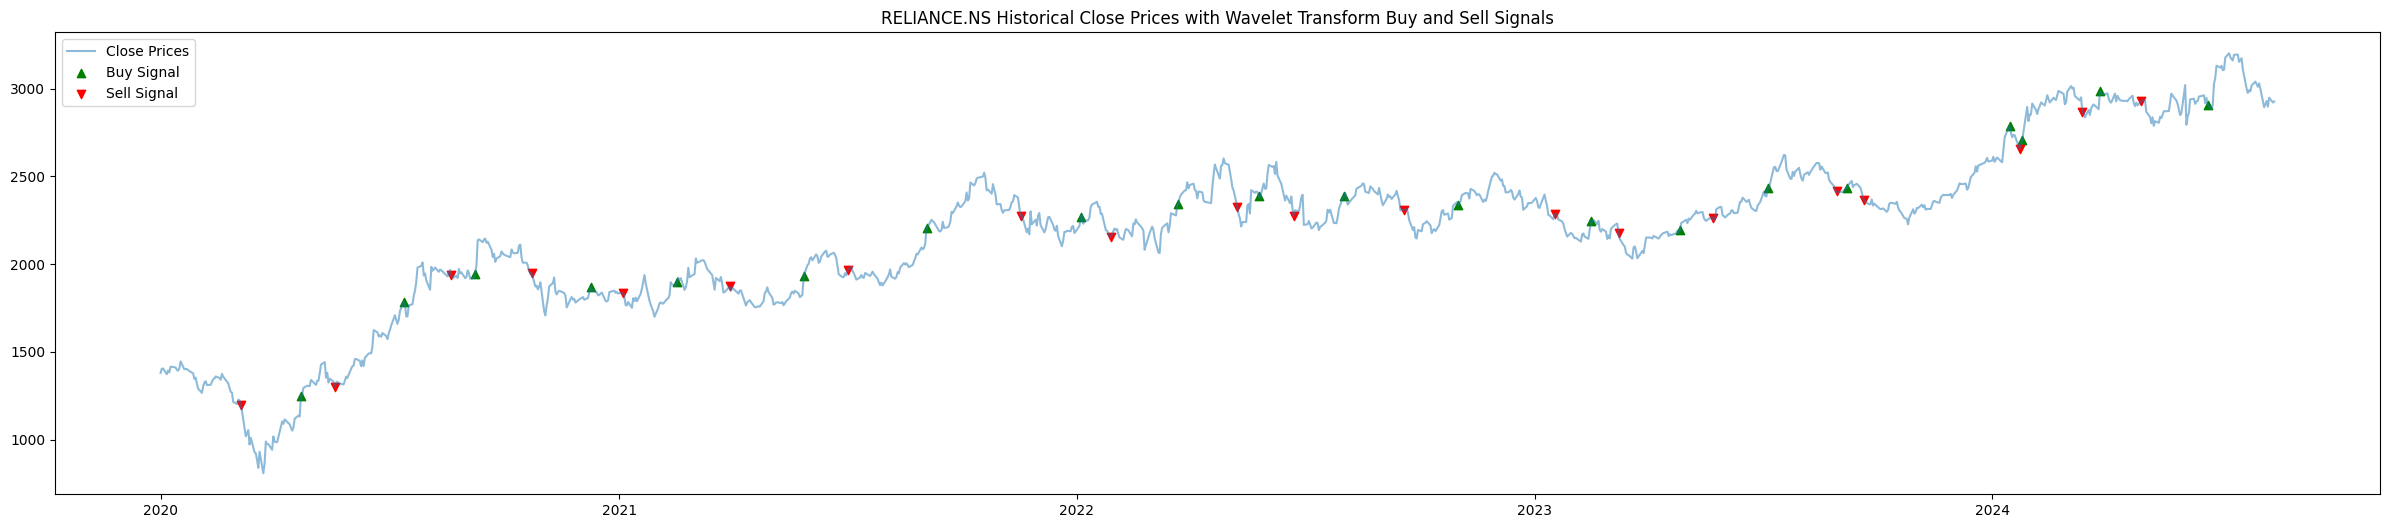

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 6))
plt.plot(stock_data.index, stock_data['Close'], label='Close Prices', alpha=0.5)
plt.scatter(stock_data.index[cross_above], stock_data['Close'][cross_above], label='Buy Signal', marker='^', color='g')
plt.scatter(stock_data.index[cross_below], stock_data['Close'][cross_below], label='Sell Signal', marker='v', color='r')
plt.title(f'{ticker} Historical Close Prices with Wavelet Transform Buy and Sell Signals')
plt.legend()
plt.show()

#Pairwise Analysis for Stocks Using Advanced Data Analysis

In [7]:
tickers_df = pd.read_csv("/content/portfolio.csv")

In [8]:
tickers_df

Symbol  Current Price        Date       Time      Change  \
0    ADANIPORTS.BO        1461.75  2024/08/14  15:45 IST  -21.900024   
1    ADANIPORTS.NS        1460.00  2024/08/14  15:29 IST  -23.449951   
2    ULTRACEMCO.BO       10991.35  2024/08/14  15:29 IST -276.850600   
3    ULTRACEMCO.NS       11006.55  2024/08/14  15:29 IST -264.650400   
4         DMART.BO        4949.00  2024/08/14  15:29 IST   23.899902   
..             ...            ...         ...        ...         ...   
195        ALPA.NS          94.05  2024/08/14  15:29 IST    2.130005   
196       DUCON.BO           7.71  2024/08/14  15:29 IST   -0.030000   
197         AKI.BO          22.51  2024/08/14  15:45 IST   -0.680000   
198   DGCONTENT.BO          34.42  2024/08/14  11:25 IST    0.399998   
199       DUCON.NS           7.70  2024/08/14  15:29 IST   -0.020000   

         Open      High       Low   Volume  Trade Date  Purchase Price  \
0     1484.55   1488.00   1451.45   237652         NaN             NaN   
1     1488.00   1488.00   1452.00  2647678         NaN             NaN   
2    11200.00  11200.00  10970.00    10327         NaN             NaN   
3    11200.00  11200.00  10963.10   404673         NaN             NaN   
4     4960.00   5015.40   4912.10     6088         NaN             NaN   
..        ...       ...       ...      ...         ...             ...   
195     92.19     99.50     92.19   330679         NaN             NaN   
196      7.80      8.10      7.57   164806         NaN             NaN   
197     23.12     23.54     22.04    31978         NaN             NaN   
198     34.50     34.50     34.42     1004         NaN             NaN   
199      7.88      8.15      7.55  1301776         NaN             NaN   

     Quantity  Commission  High Limit  Low Limit  Comment  
0         NaN         NaN         NaN        NaN      NaN  
1         NaN         NaN         NaN        NaN      NaN  
2         NaN         NaN         NaN        NaN      NaN  
3         NaN         NaN         NaN        NaN      NaN  
4         NaN         NaN         NaN        NaN      NaN  
..        ...         ...         ...        ...      ...  
195       NaN         NaN         NaN        NaN      NaN  
196       NaN         NaN         NaN        NaN      NaN  
197       NaN         NaN         NaN        NaN      NaN  
198       NaN         NaN         NaN        NaN      NaN  
199       NaN         NaN         NaN        NaN      NaN  

[200 rows x 16 columns]

In [9]:
tickers = tickers_df['Symbol']

In [10]:
u_tickers = []
for i in tickers:
    u_tickers.append(i)


In [11]:
u_tickers

['ADANIPORTS.BO',
 'ADANIPORTS.NS',
 'ULTRACEMCO.BO',
 'ULTRACEMCO.NS',
 'DMART.BO',
 'DMART.NS',
 'ADANIENT.BO',
 'ADANIENT.NS',
 'KOTAKBANK.NS',
 'KOTAKBANK.BO',
 'AXISBANK.BO',
 'AXISBANK.NS',
 'MARUTI.NS',
 'MARUTI.BO',
 'NTPC.BO',
 'NTPC.NS',
 'TATAMTRDVR.BO',
 'TATAMTRDVR.NS',
 'TATAMOTORS.BO',
 'TATAMOTORS.NS',
 'BAJFINANCE.BO',
 'BAJFINANCE.NS',
 'ONGC.NS',
 'ONGC.BO',
 'SUNPHARMA.NS',
 'SUNPHARMA.BO',
 'HCLTECH.BO',
 'HCLTECH.NS',
 'LT.BO',
 'LT.NS',
 'ITC.BO',
 'ITC.NS',
 'HINDUNILVR.NS',
 'HINDUNILVR.BO',
 'LICI.BO',
 'LICI.NS',
 'SBIN.NS',
 'SBIN.BO',
 'INFY.NS',
 'INFY.BO',
 'ICICIBANK.NS',
 'ICICIBANK.BO',
 'BHARTIARTL.NS',
 'BHARTIARTL.BO',
 'HDFCBANK.NS',
 'HDFCBANK.BO',
 'TCS.BO',
 'TCS.NS',
 'RELIANCE.BO',
 'RELIANCE.NS',
 'CMSINFO.NS',
 'CMSINFO.BO',
 'SBFC.NS',
 'SBFC.BO',
 'MAHLIFE.NS',
 'MAHLIFE.BO',
 'TIPSINDLTD.NS',
 'TIPSINDLTD.BO',
 'LEMONTREE.BO',
 'LEMONTREE.NS',
 'SAMMAANCAP.NS',
 'SAMMAANCAP.BO',
 'JKLAKSHMI.BO',
 'JKLAKSHMI.NS',
 'AZAD.NS',
 'AZAD.BO',
 '

###We load data using yahoo finance for the top 50 stocks in Mega/High/Mid/Low Cap stocks across both the Indian BSE and NSE exchanges over a period of approximately 3.5 years.


In [12]:
def load_ticker_ts_df(ticker, start_date, end_date):
    """
    Load and cache time series financial data from Yahoo Finance API.
    Parameters:
    - ticker (str): The stock ticker symbol (e.g., 'AAPL' for Apple Inc.).
    - start_date (str): The start date in 'YYYY-MM-DD' format for data retrieval.
    - end_date (str): The end date in 'YYYY-MM-DD' format for data retrieval.
    Returns:
    - df (pandas.DataFrame): A DataFrame containing the financial time series data."""
    dir_path = './data'
    cached_file_path = f'{dir_path}/{ticker}_{start_date}_{end_date}.pkl'
    try:
        if os.path.exists(cached_file_path):
            df = pd.read_pickle(cached_file_path)
        else:
            df = yf.download(ticker, start=start_date, end=end_date)
            if not os.path.exists(dir_path):
                os.makedirs(dir_path)
            df.to_pickle(cached_file_path)
    except FileNotFoundError:
        print(
            f'Error downloading and caching or loading file with ticker: {ticker}')
    return df


In [13]:
START_DATE = '2021-01-01'
END_DATE = '2024-08-14'

u_tickers_ts_map = {ticker: load_ticker_ts_df(
    ticker, START_DATE, END_DATE) for ticker in u_tickers}

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [ ]:
for ticker in u_tickers:
    print(ticker)

In [14]:
def sanitize_data(data_map):
    TS_DAYS_LENGTH = (pd.to_datetime(END_DATE) -
                      pd.to_datetime(START_DATE)).days
    data_sanitized = {}
    date_range = pd.date_range(start=START_DATE, end=END_DATE, freq='D')
    for ticker, data in data_map.items():
        if data is None or len(data) < (TS_DAYS_LENGTH / 2):
            # We cannot handle shorter TSs
            continue
        if len(data) > TS_DAYS_LENGTH:
            # Normalize to have the same length (TS_DAYS_LENGTH)
            data = data[-TS_DAYS_LENGTH:]
        # Reindex the time series to match the date range and fill in any blanks (Not Numbers)
        data = data.reindex(date_range)
        data['Adj Close'].replace([np.inf, -np.inf], np.nan, inplace=True)
        data['Adj Close'].interpolate(method='linear', inplace=True)
        data['Adj Close'].fillna(method='pad', inplace=True)
        data['Adj Close'].fillna(method='bfill', inplace=True)
        assert not np.any(np.isnan(data['Adj Close'])) and not np.any(
            np.isinf(data['Adj Close']))
        data_sanitized[ticker] = data
    return data_sanitized

# Sample some
uts_sanitized = sanitize_data(u_tickers_ts_map)
uts_sanitized['ADANIPORTS.BO'].shape, uts_sanitized['TATAMOTORS.NS'].shape

<ipython-input-14-755a020464a3>:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Adj Close'].fillna(method='pad', inplace=True)
<ipython-input-14-755a020464a3>:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Adj Close'].fillna(method='bfill', inplace=True)


((1322, 6), (1322, 6))

In [15]:
u_tickers_ts_map

{'ADANIPORTS.BO':                    Open         High          Low        Close    Adj Close  \
 Date                                                                          
 2021-01-01   484.700012   507.500000   483.000000   503.500000   494.436462   
 2021-01-04   505.549988   510.799988   495.500000   498.850006   489.870178   
 2021-01-05   501.000000   504.500000   492.549988   499.500000   490.508453   
 2021-01-06   504.000000   504.500000   489.450012   496.700012   487.758881   
 2021-01-07   499.000000   520.950012   499.000000   513.650024   504.403778   
 ...                 ...          ...          ...          ...          ...   
 2024-08-07  1523.150024  1547.050049  1514.300049  1544.300049  1544.300049   
 2024-08-08  1537.900024  1555.500000  1513.500000  1518.250000  1518.250000   
 2024-08-09  1542.449951  1542.449951  1519.050049  1533.300049  1533.300049   
 2024-08-12  1480.000000  1524.250000  1457.349976  1502.300049  1502.300049   
 2024-08-13  1506.00000

In [16]:
from statsmodels.tsa.stattools import coint
from itertools import combinations
from statsmodels.tsa.stattools import coint

def find_cointegrated_pairs(tickers_ts_map, p_value_threshold=0.2):
    """
    Find cointegrated pairs of stocks based on the Augmented Dickey-Fuller (ADF) test.
    Parameters:
    - tickers_ts_map (dict): A dictionary where keys are stock tickers and values are time series data.
    - p_value_threshold (float): The significance level for cointegration testing.
    Returns:
    - pvalue_matrix (numpy.ndarray): A matrix of cointegration p-values between stock pairs.
    - pairs (list): A list of tuples representing cointegrated stock pairs and their p-values.
    """
    tickers = list(tickers_ts_map.keys())
    n = len(tickers)
    # Extract 'Adj Close' prices into a matrix (each column is a time series)
    adj_close_data = np.column_stack(
        [tickers_ts_map[ticker]['Adj Close'].values for ticker in tickers])
    pvalue_matrix = np.ones((n, n))
    # Calculate cointegration p-values for unique pair combinations
    for i, j in combinations(range(n), 2):
        result = coint(adj_close_data[:, i], adj_close_data[:, j])
        pvalue_matrix[i, j] = result[1]
    pairs = [(tickers[i], tickers[j], pvalue_matrix[i, j])
             for i, j in zip(*np.where(pvalue_matrix < p_value_threshold))]
    return pvalue_matrix, pairs

In [17]:
P_VALUE_THRESHOLD = 0.02
pvalues, pairs = find_cointegrated_pairs(
    uts_sanitized, p_value_threshold=P_VALUE_THRESHOLD)

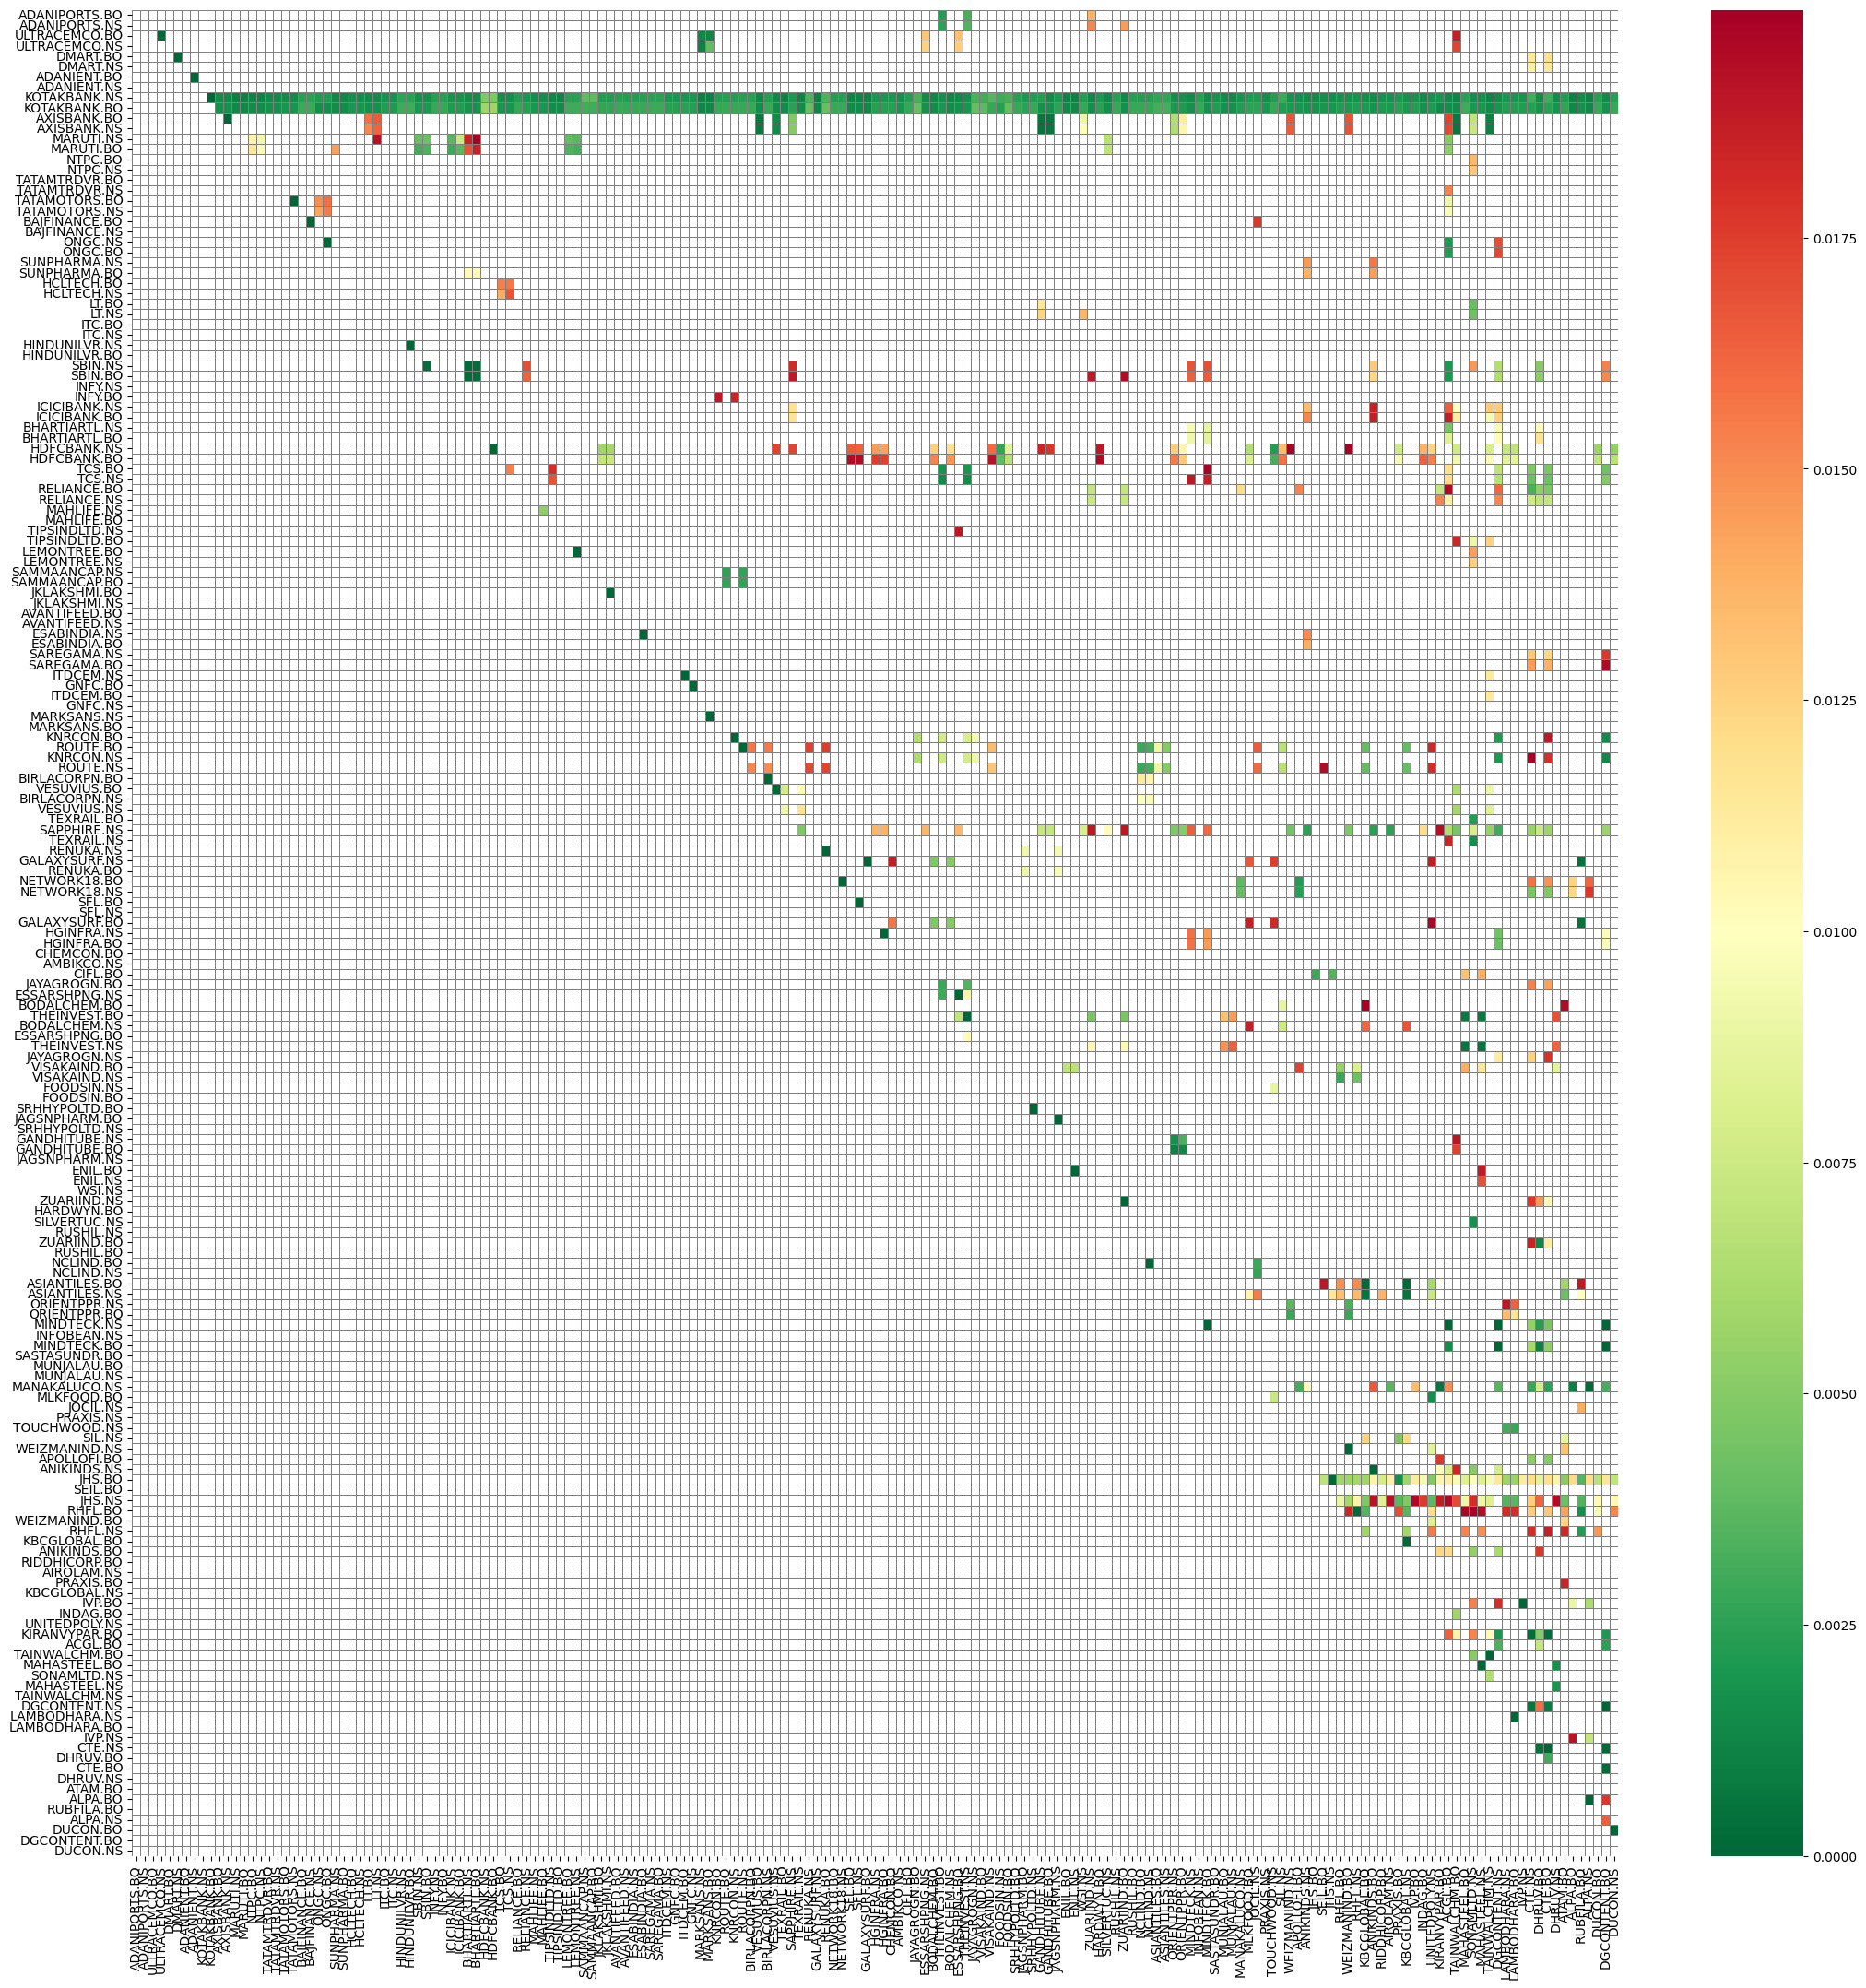

In [18]:
import seaborn as sns

plt.figure(figsize=(26, 26))
heatmap = sns.heatmap(pvalues, xticklabels=uts_sanitized.keys(),
                      yticklabels=uts_sanitized.keys(), cmap='RdYlGn_r',
                      mask=(pvalues > (P_VALUE_THRESHOLD)),
                      linecolor='gray', linewidths=0.5)
heatmap.set_xticklabels(heatmap.get_xticklabels(), size=10)
heatmap.set_yticklabels(heatmap.get_yticklabels(), size=10)
plt.show()


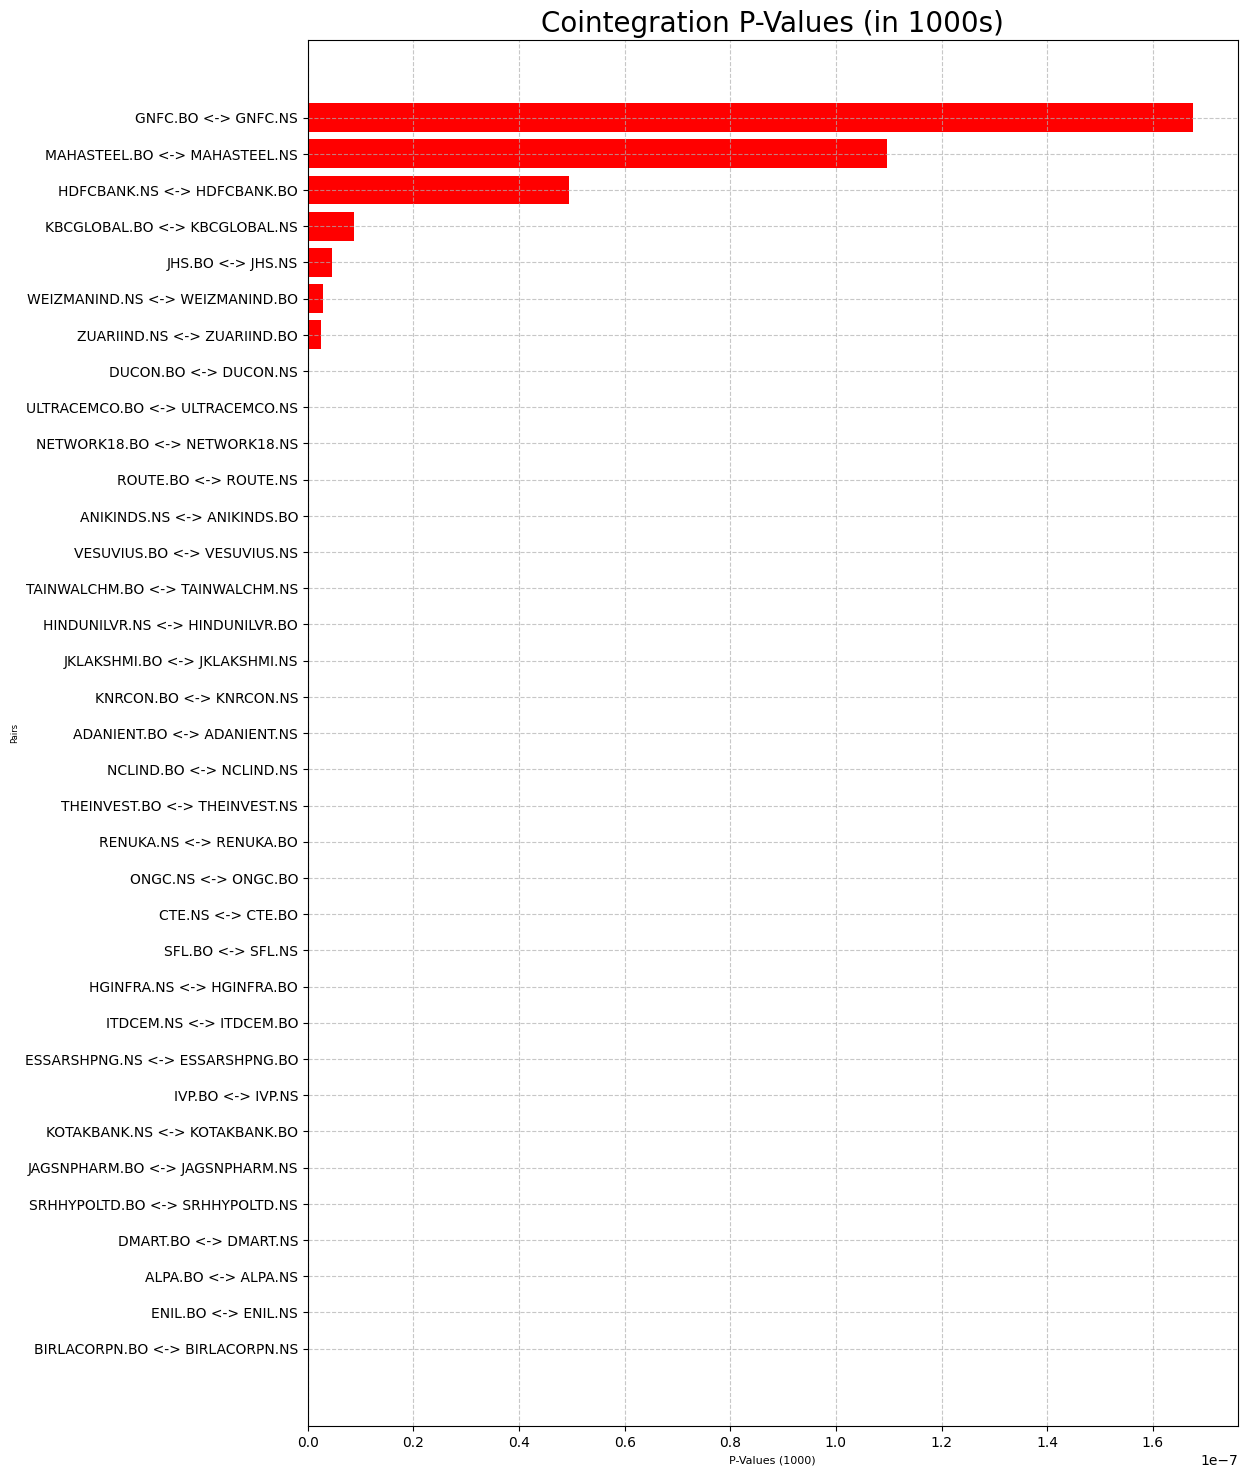

In [19]:
sorted_pairs = sorted(pairs, key=lambda x: x[2], reverse=False)
sorted_pairs = sorted_pairs[0:35]
sorted_pairs_labels, pairs_p_values = zip(
    *[(f'{y1} <-> {y2}', p*1000) for y1, y2, p in sorted_pairs])
plt.figure(figsize=(12, 18))
plt.barh(sorted_pairs_labels,
         pairs_p_values, color='red')
plt.xlabel('P-Values (1000)', fontsize=8)
plt.ylabel('Pairs', fontsize=6)
plt.title('Cointegration P-Values (in 1000s)', fontsize=20)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()


## We find that many stocks are listed under both NSE and BSE. Therefore we choose to proceed with only the top 25 stocks from each Cap Level under the Bombay Stock Exchange.

In [21]:
bo = pd.read_csv('/content/bo.csv')

In [22]:
bo.head()

Symbol  Current Price        Date       Time      Change     Open  \
0       ALKEM.BO        5672.35  2024/08/14  15:29 IST  -33.949707  5707.45   
1   AKZOINDIA.BO        3181.95  2024/08/14  15:28 IST  -24.449951  3194.70   
2  AJANTPHARM.BO        3045.45  2024/08/14  15:57 IST -130.650150  3199.50   
3        AIIL.BO        1380.15  2024/08/14  15:29 IST  -24.500000  1440.00   
4      AIAENG.BO        4560.15  2024/08/14  15:41 IST   28.899902  4621.00   

      High      Low  Volume  Trade Date  Purchase Price  Quantity  Commission  \
0  5816.95  5670.50    2549         NaN             NaN       NaN         NaN   
1  3224.40  3167.95     980         NaN             NaN       NaN         NaN   
2  3384.05  3025.00   28710         NaN             NaN       NaN         NaN   
3  1440.00  1340.00    9971         NaN             NaN       NaN         NaN   
4  4621.00  4535.00    3788         NaN             NaN       NaN         NaN   

   High Limit  Low Limit  Comment  
0         NaN        NaN      NaN  
1         NaN        NaN      NaN  
2         NaN        NaN      NaN  
3         NaN        NaN      NaN  
4         NaN        NaN      NaN

In [23]:
bo_tickers = []
for i in bo['Symbol']:
    bo_tickers.append(i)


In [24]:
bo_tickers

['ALKEM.BO',
 'AKZOINDIA.BO',
 'AJANTPHARM.BO',
 'AIIL.BO',
 'AIAENG.BO',
 'AFFLE.BO',
 'AETHER.BO',
 'AEGISLOG.BO',
 'ADANIPOWER.BO',
 'ADANIPORTS.BO',
 'ADANIGREEN.BO',
 'ADANIENT.BO',
 'ADANIENSOL.BO',
 'ACE.BO',
 'ACC.BO',
 'ABSLAMC.BO',
 'ABFRL.BO',
 'ABCAPITAL.BO',
 'ABBOTINDIA.BO',
 'ABB.BO',
 'AAVAS.BO',
 'AARTIIND.BO',
 'AADHARHFC.BO',
 '3MINDIA.BO',
 '360ONE.BO',
 'CMSINFO.BO',
 'SBFC.BO',
 'MAHLIFE.BO',
 'TIPSINDLTD.BO',
 'LEMONTREE.BO',
 'SAMMAANCAP.BO',
 'JKLAKSHMI.BO',
 'AZAD.BO',
 'AVANTIFEED.BO',
 'ESABINDIA.BO',
 'SAREGAMA.BO',
 'GNFC.BO',
 'ITDCEM.BO',
 'MARKSANS.BO',
 'KNRCON.BO',
 'ROUTE.BO',
 'BIRLACORPN.BO',
 'VESUVIUS.BO',
 'TEXRAIL.BO',
 'SAPPHIRE.BO',
 'RENUKA.BO',
 'NETWORK18.BO',
 'SFL.BO',
 'GALAXYSURF.BO',
 'HGINFRA.BO',
 'CIFL.BO',
 'JAYAGROGN.BO',
 'BODALCHEM.BO',
 'THEINVEST.BO',
 'ESSARSHPNG.BO',
 'VISAKAIND.BO',
 'FOODSIN.BO',
 'SRHHYPOLTD.BO',
 'JAGSNPHARM.BO',
 'GANDHITUBE.BO',
 'WSI.BO',
 'ENIL.BO',
 'TRACXN.BO',
 'HARDWYN.BO',
 'SILVERTUC.BO',
 'ZU

In [25]:
START_DATE = '2021-01-01'
END_DATE = '2024-08-14'

bo_tickers_ts_map = {ticker: load_ticker_ts_df(
    ticker, START_DATE, END_DATE) for ticker in bo_tickers}

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [26]:
bo_tickers_ts_map

{'ALKEM.BO':                    Open         High          Low        Close    Adj Close  \
 Date                                                                          
 2021-01-01  2950.000000  2980.000000  2916.949951  2950.149902  2828.739258   
 2021-01-04  2967.000000  2979.000000  2945.899902  2967.649902  2845.519287   
 2021-01-05  2967.649902  3030.000000  2937.899902  2985.149902  2862.299316   
 2021-01-06  2999.000000  3002.250000  2972.949951  2982.699951  2859.949951   
 2021-01-07  2993.199951  3019.199951  2982.300049  3012.199951  2888.236084   
 ...                 ...          ...          ...          ...          ...   
 2024-08-07  5353.850098  5529.000000  5353.850098  5515.700195  5510.851074   
 2024-08-08  5545.000000  5747.299805  5496.799805  5687.299805  5682.299805   
 2024-08-09  5743.950195  5849.000000  5515.299805  5793.149902  5793.149902   
 2024-08-12  5867.399902  5867.399902  5661.000000  5712.750000  5712.750000   
 2024-08-13  5750.000000  57

In [28]:
uts_sanitized = sanitize_data(bo_tickers_ts_map)

<ipython-input-14-755a020464a3>:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Adj Close'].fillna(method='pad', inplace=True)
<ipython-input-14-755a020464a3>:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Adj Close'].fillna(method='bfill', inplace=True)


In [29]:
P_VALUE_THRESHOLD = 0.02
pvalues1, pairs1 = find_cointegrated_pairs(
    uts_sanitized, p_value_threshold=P_VALUE_THRESHOLD)

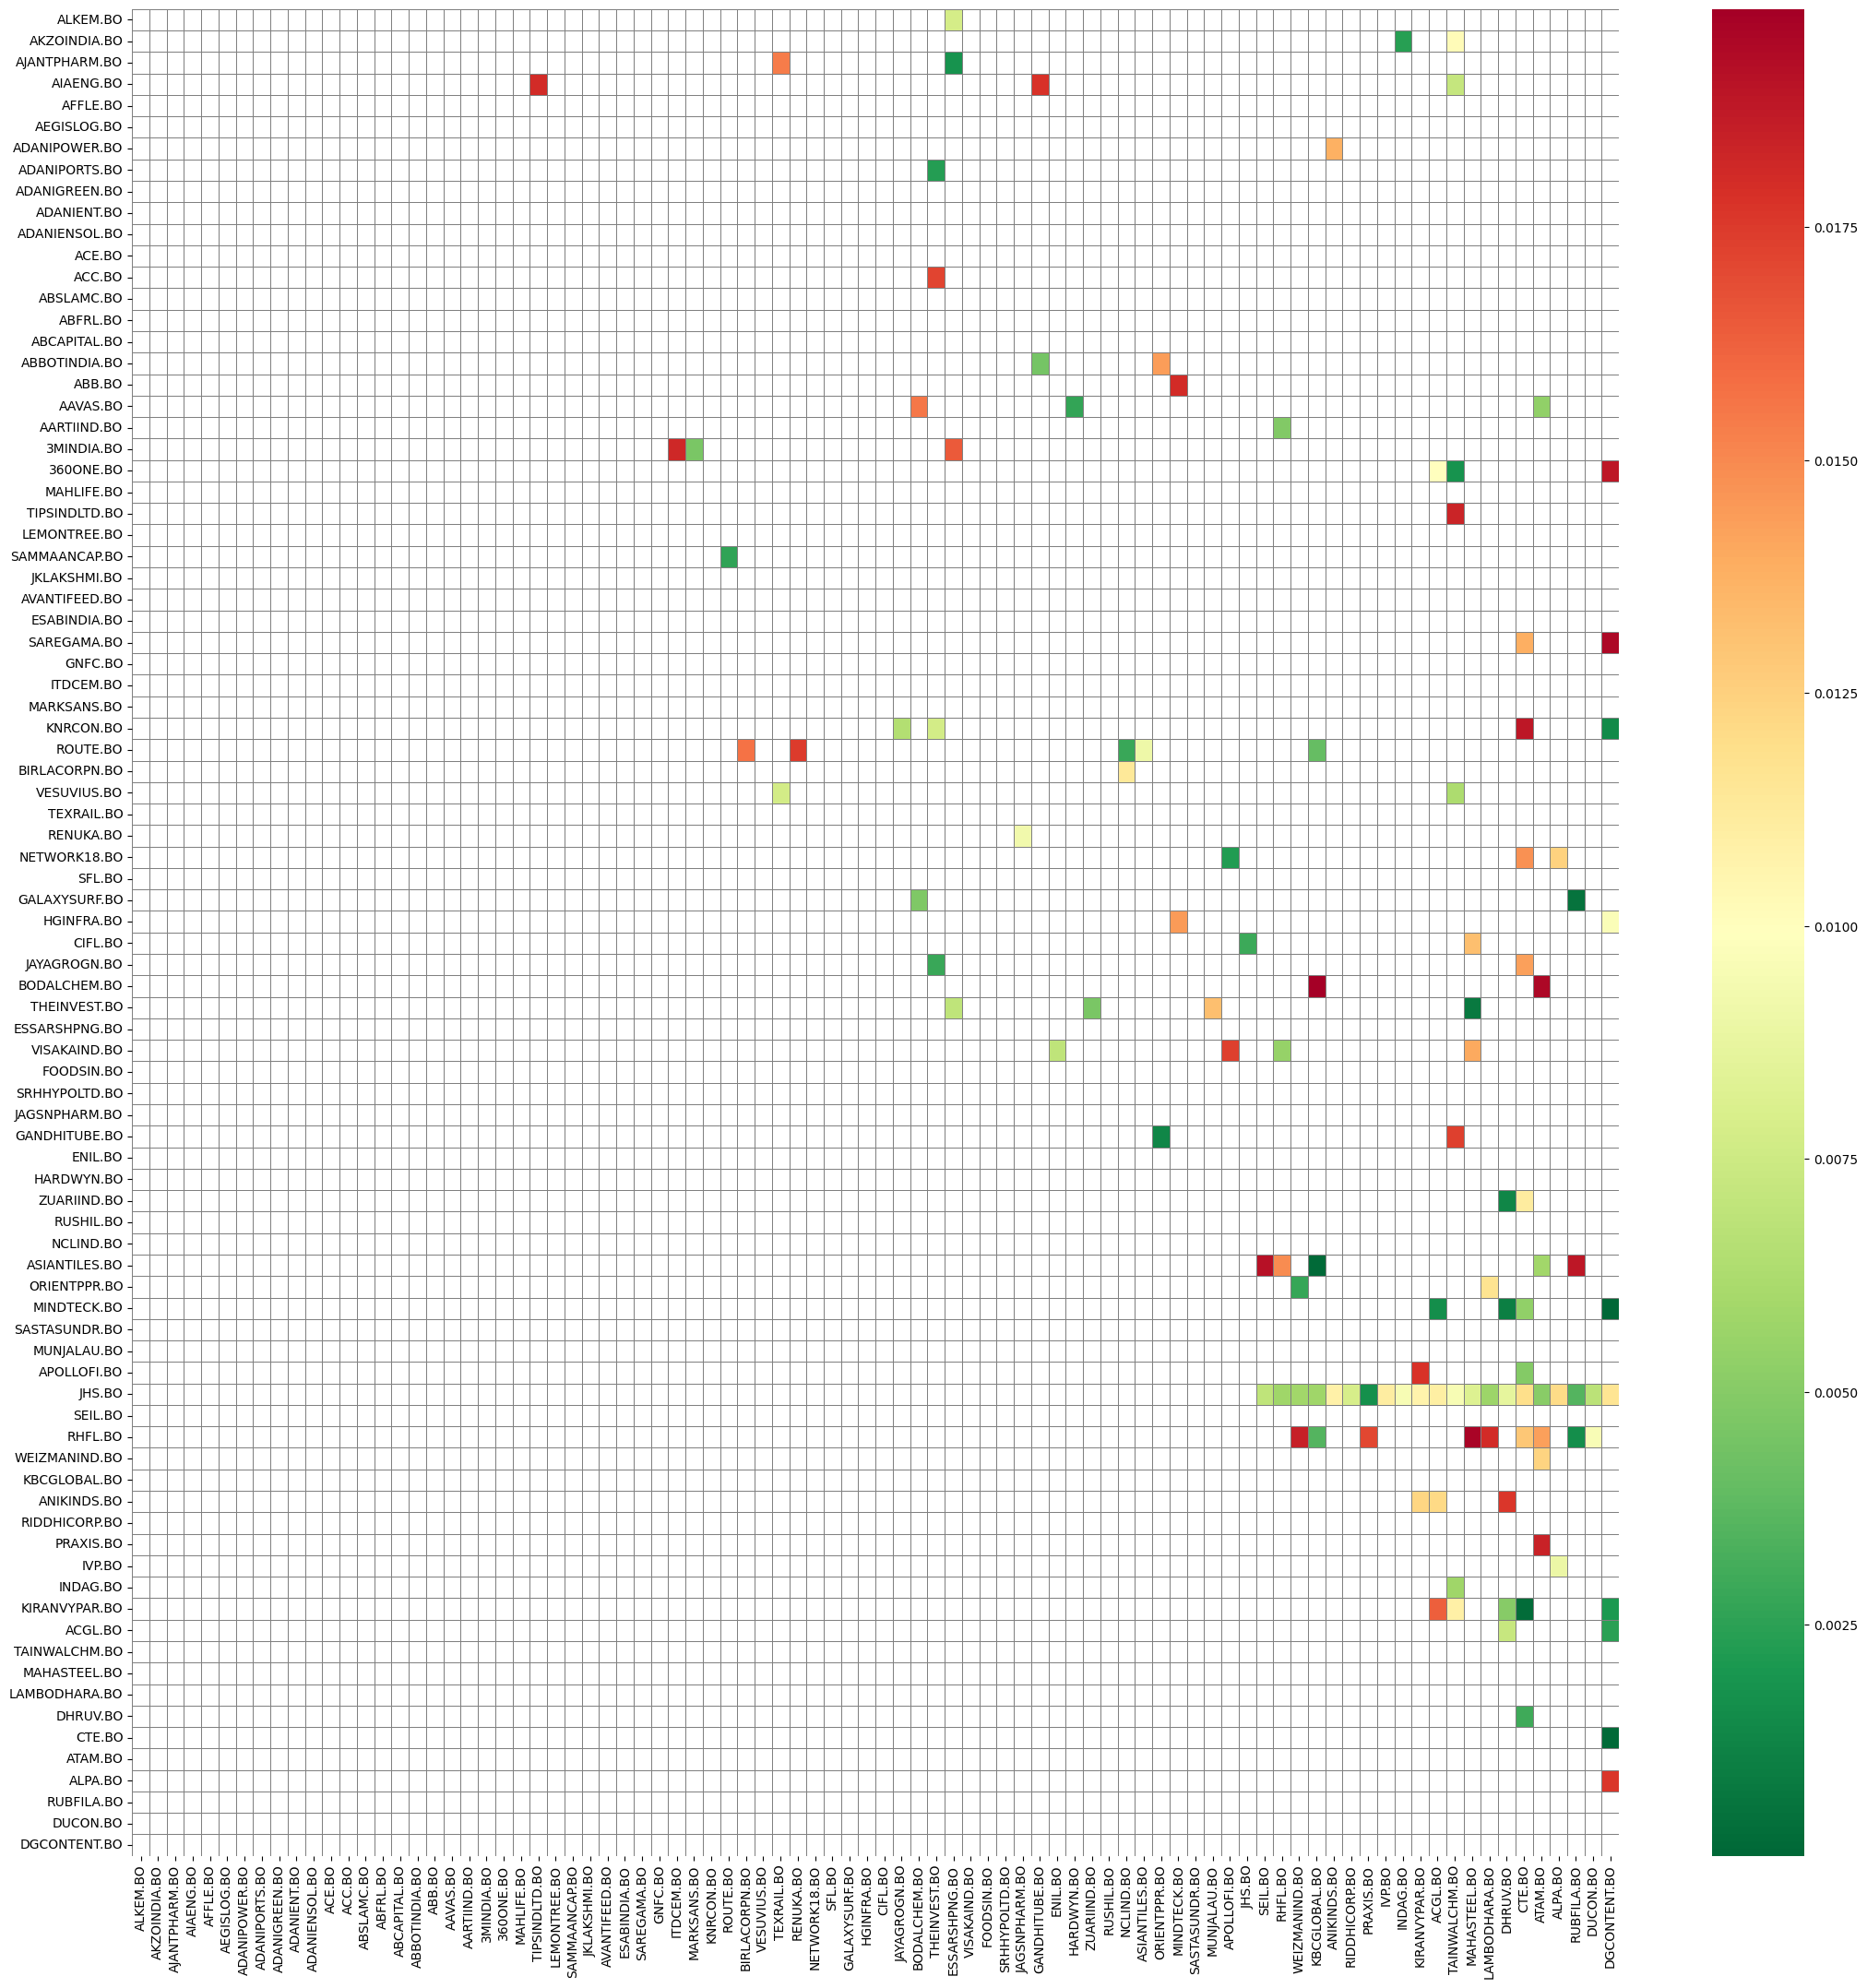

In [30]:
plt.figure(figsize=(26, 26))
heatmap = sns.heatmap(pvalues1, xticklabels=uts_sanitized.keys(),
                      yticklabels=uts_sanitized.keys(), cmap='RdYlGn_r',
                      mask=(pvalues1 > (P_VALUE_THRESHOLD)),
                      linecolor='gray', linewidths=0.5)
heatmap.set_xticklabels(heatmap.get_xticklabels(), size=10)
heatmap.set_yticklabels(heatmap.get_yticklabels(), size=10)
plt.show()


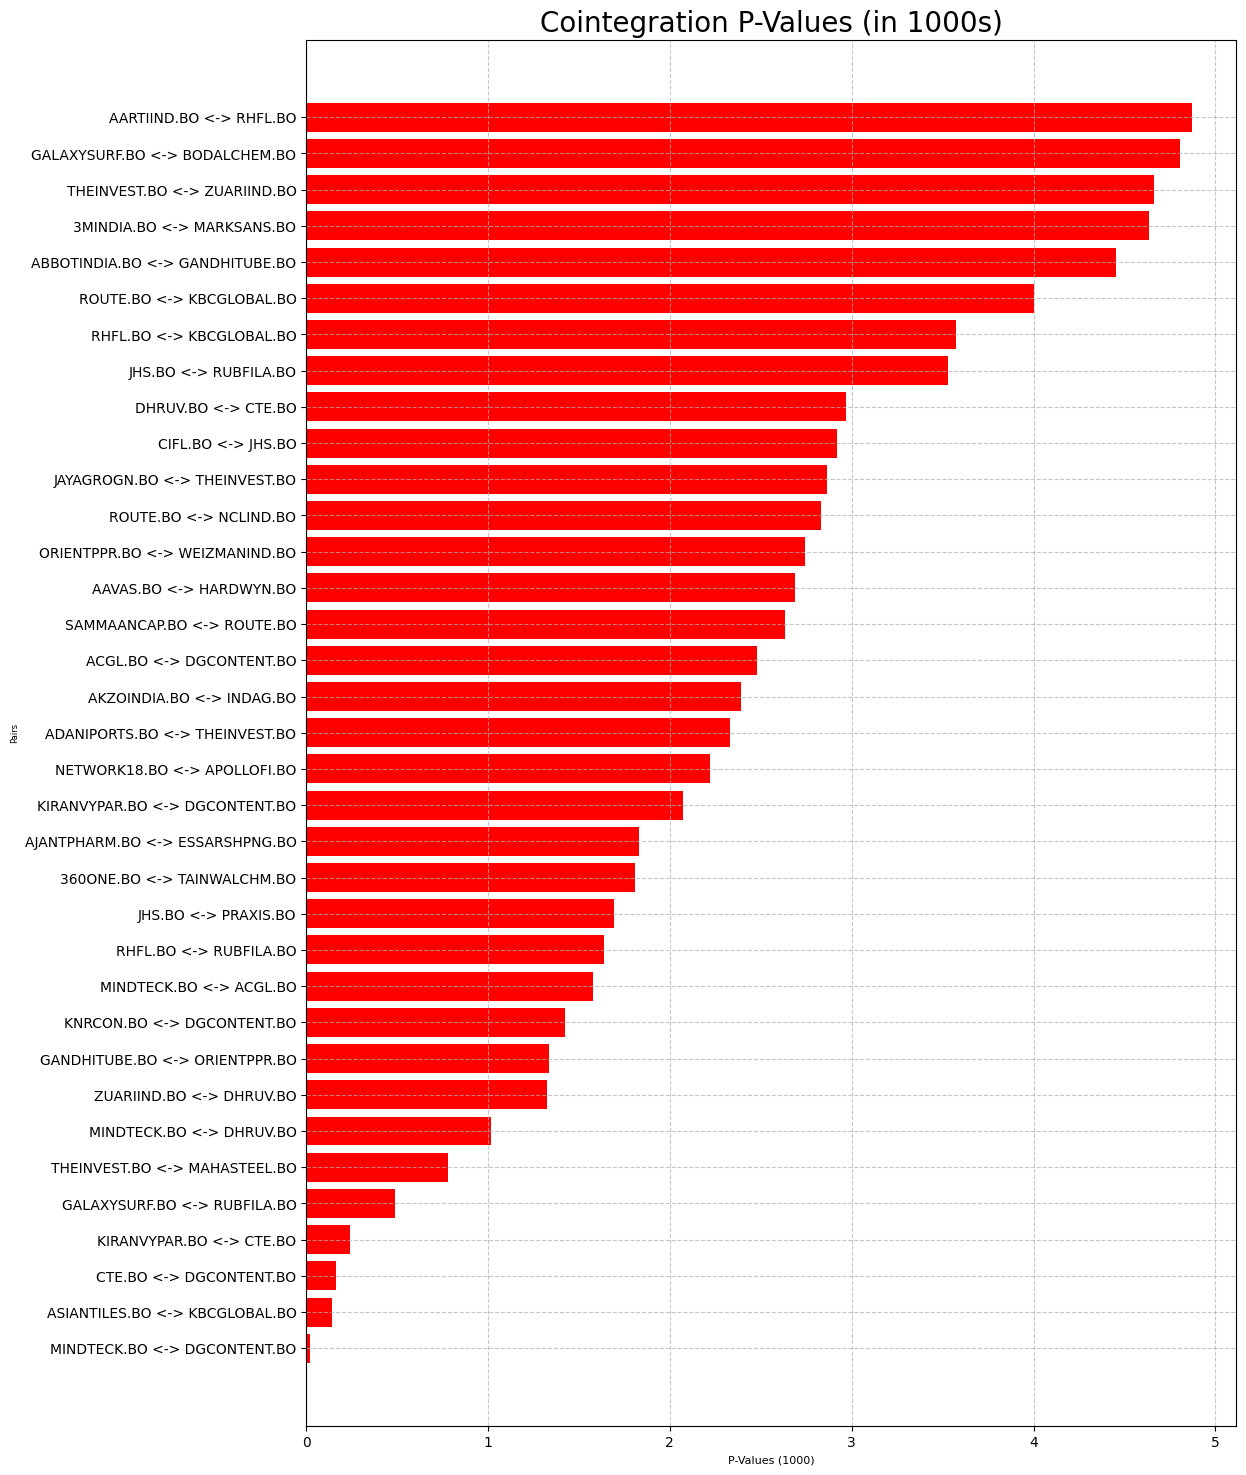

In [31]:
sorted_pairs = sorted(pairs1, key=lambda x: x[2], reverse=False)
sorted_pairs = sorted_pairs[0:35]
sorted_pairs_labels, pairs_p_values = zip(
    *[(f'{y1} <-> {y2}', p*1000) for y1, y2, p in sorted_pairs])
plt.figure(figsize=(12, 18))
plt.barh(sorted_pairs_labels,
         pairs_p_values, color='red')
plt.xlabel('P-Values (1000)', fontsize=8)
plt.ylabel('Pairs', fontsize=6)
plt.title('Cointegration P-Values (in 1000s)', fontsize=20)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

## We choose to look at the top 3 pairs scaled prices with relation to each other, we also look at their smoothed curves using SMA

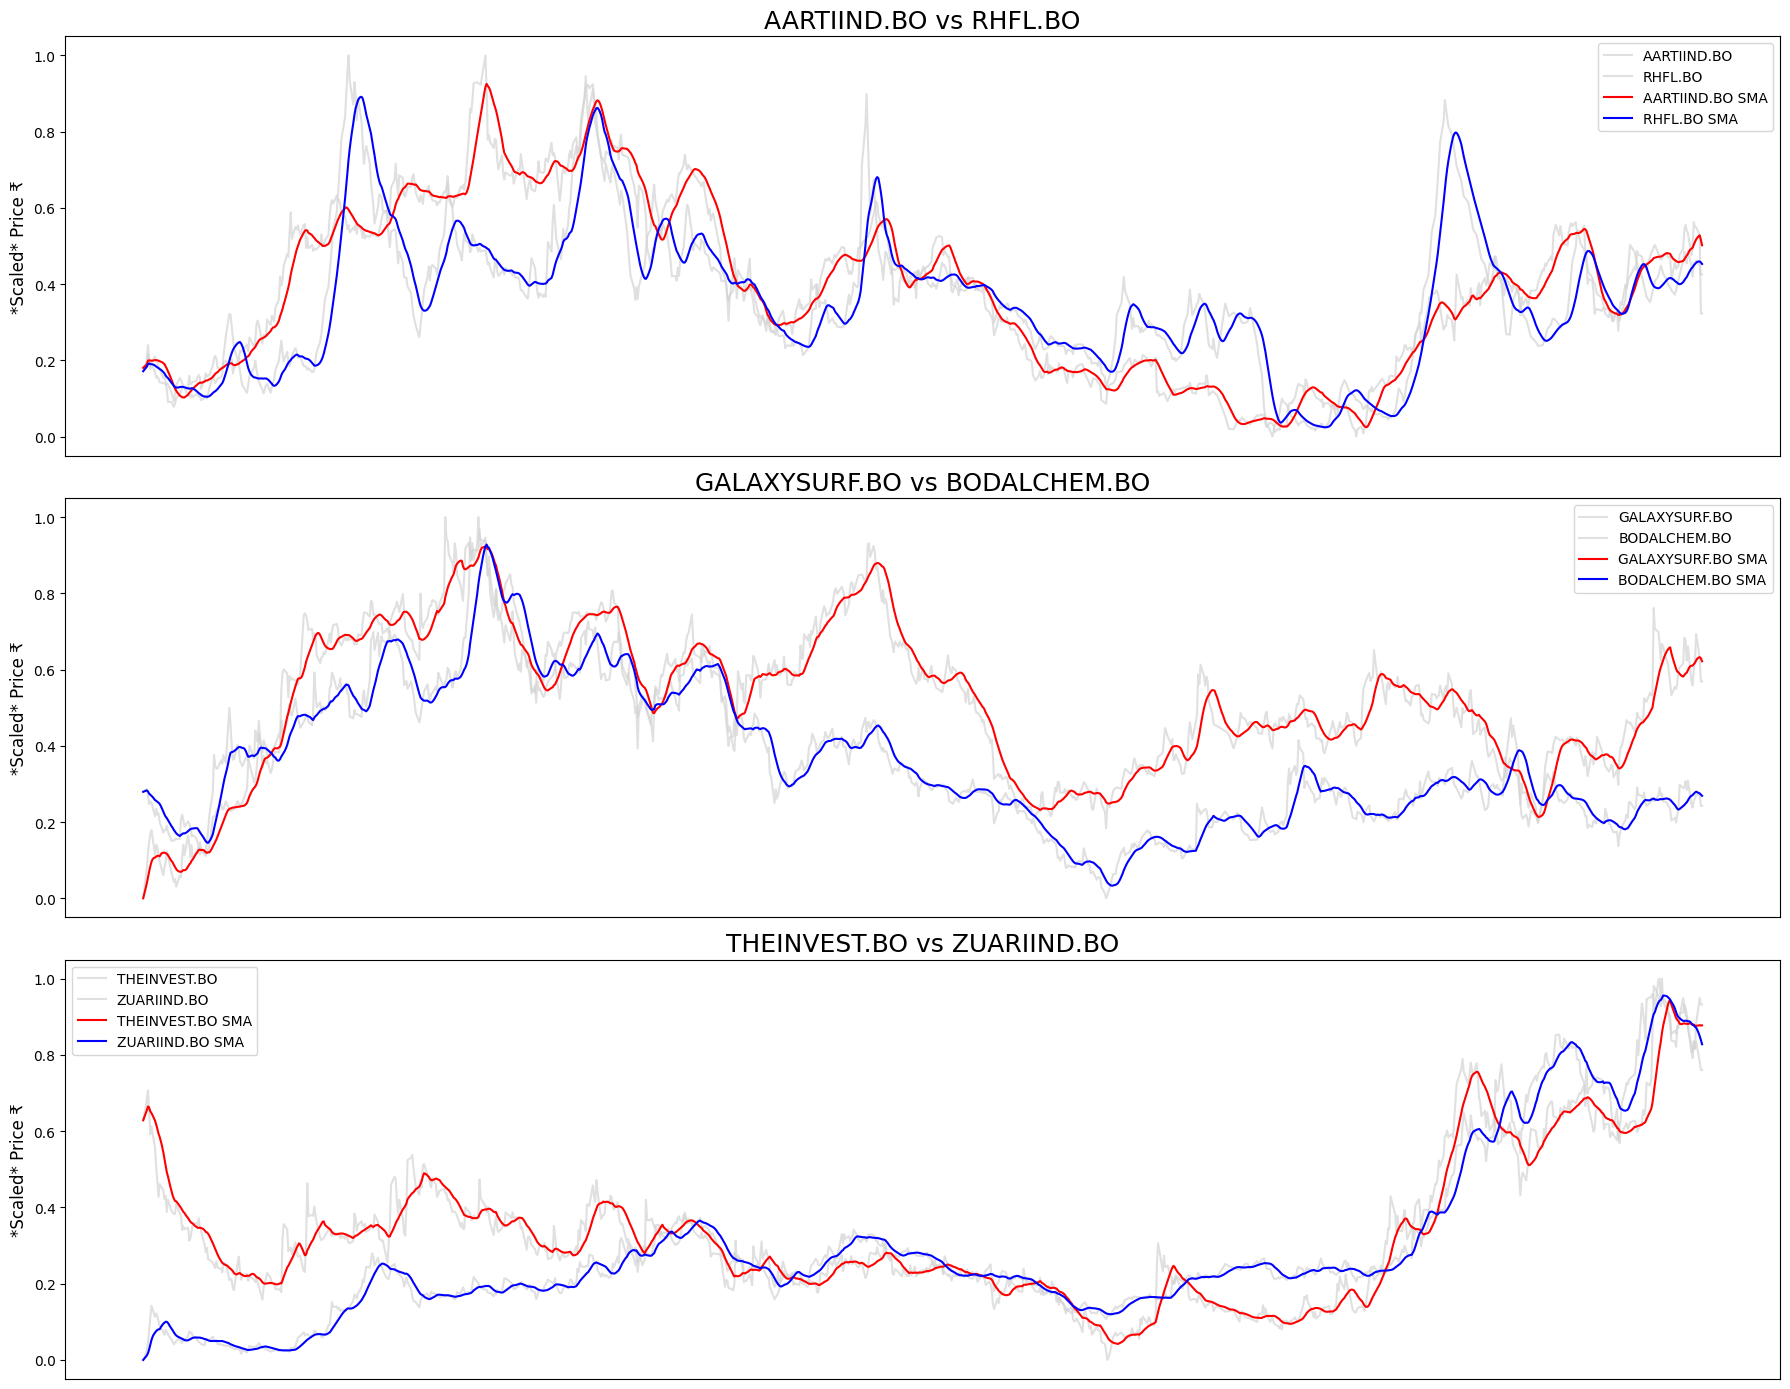

In [32]:
from sklearn.preprocessing import MinMaxScaler

ticker_pairs = [("AARTIIND.BO", "RHFL.BO"), ("GALAXYSURF.BO", "BODALCHEM.BO"), ("THEINVEST.BO", "ZUARIIND.BO")]
fig, axs = plt.subplots(3, 1, figsize=(18, 14))
scaler = MinMaxScaler()
for i, (ticker1, ticker2) in enumerate(ticker_pairs):
    # Scale the price data for each pair using MIN MAX
    scaled_data1 = scaler.fit_transform(
        uts_sanitized[ticker1]['Adj Close'].values.reshape(-1, 1))
    scaled_data2 = scaler.fit_transform(
        uts_sanitized[ticker2]['Adj Close'].values.reshape(-1, 1))
    axs[i].plot(scaled_data1, label=f'{ticker1}', color='lightgray', alpha=0.7)
    axs[i].plot(scaled_data2, label=f'{ticker2}', color='lightgray', alpha=0.7)
    # Apply rolling mean with a window of 15
    scaled_data1_smooth = pd.Series(scaled_data1.flatten()).rolling(
        window=15, min_periods=1).mean()
    scaled_data2_smooth = pd.Series(scaled_data2.flatten()).rolling(
        window=15, min_periods=1).mean()
    axs[i].plot(scaled_data1_smooth, label=f'{ticker1} SMA', color='red')
    axs[i].plot(scaled_data2_smooth, label=f'{ticker2} SMA', color='blue')
    axs[i].set_ylabel('*Scaled* Price ₹', fontsize=12)
    axs[i].set_title(f'{ticker1} vs {ticker2}', fontsize=18)
    axs[i].legend()
    axs[i].set_xticks([])
plt.tight_layout()
plt.show()

###We choose to proceed with GalaxySurf and BodalChem for our Analysis.

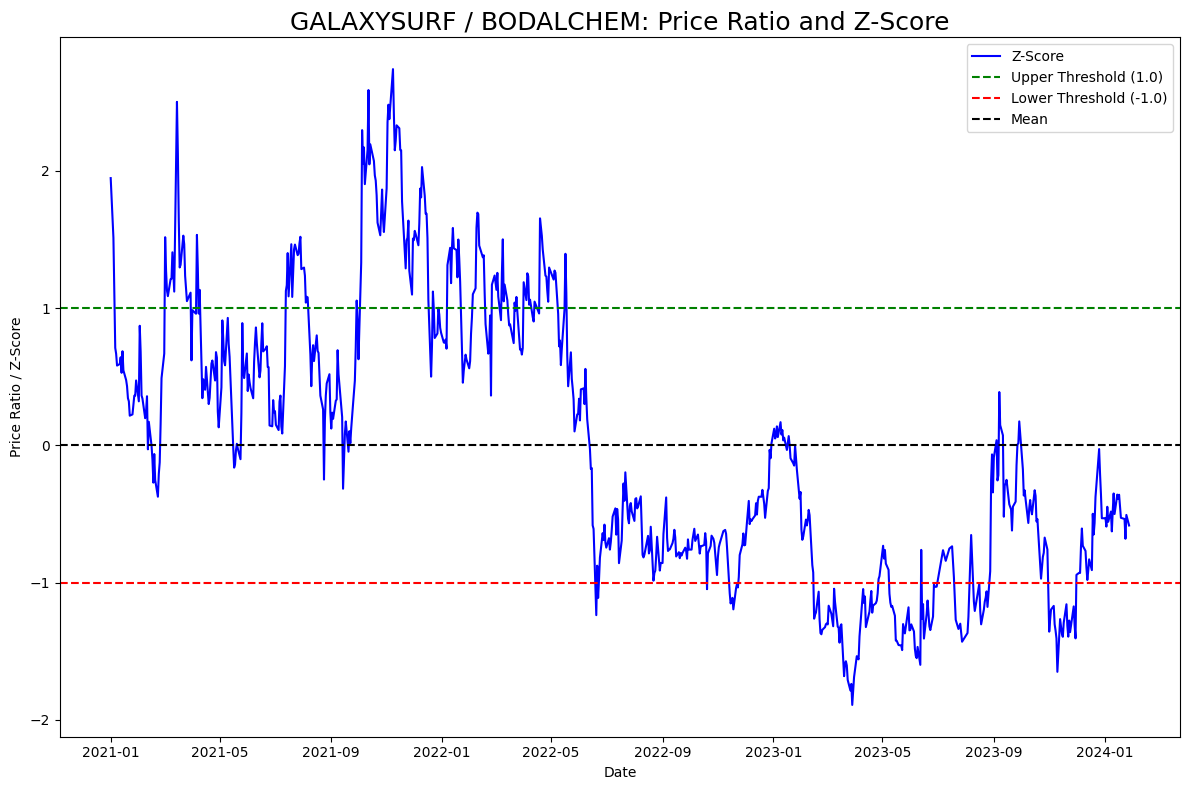

In [33]:
TRAIN = int(len(uts_sanitized["GALAXYSURF.BO"]) * 0.85)
TEST = len(uts_sanitized["GALAXYSURF.BO"]) - TRAIN

G_ts = uts_sanitized["GALAXYSURF.BO"]["Adj Close"][:TRAIN]
B_ts = uts_sanitized["BODALCHEM.BO"]["Adj Close"][:TRAIN]

ratios = B_ts/G_ts
fig, ax = plt.subplots(figsize=(12, 8))
ratios_mean = np.mean(ratios)
ratios_std = np.std(ratios)
ratios_zscore = (ratios - ratios_mean) / ratios_std
ax.plot(ratios.index, ratios_zscore, label="Z-Score", color='blue')
# Plot reference lines
ax.axhline(1.0, color="green", linestyle='--', label="Upper Threshold (1.0)")
ax.axhline(-1.0, color="red", linestyle='--', label="Lower Threshold (-1.0)")
ax.axhline(0, color="black", linestyle='--', label="Mean")
ax.set_title('GALAXYSURF / BODALCHEM: Price Ratio and Z-Score', fontsize=18)
ax.set_xlabel('Date')
ax.set_ylabel('Price Ratio / Z-Score')
ax.legend()
plt.tight_layout()
plt.show()

In [34]:
def calculate_profit(signals, prices):
    """
    Calculate cumulative profit based on trading signals and stock prices.
    Parameters:
    - signals (pandas.DataFrame): A DataFrame containing trading signals (1 for buy, -1 for sell).
    - prices (pandas.Series): A Series containing stock prices corresponding to the signal dates.
    Returns:
    - cum_profit (pandas.Series): A Series containing cumulative profit over time.
    """
    profit = pd.DataFrame(index=prices.index)
    profit['profit'] = 0.0
    buys = signals[signals['orders'] == 1].index
    sells = signals[signals['orders'] == -1].index
    while sells[0] < buys[0]:
        # These are long only strategies, we cannot start with sell
        sells = sells[1:]
    if len(buys) == 0 or len(sells) == 0:
        # no actions taken
        return profit
    if len(sells) < len(buys):
        # Assume we sell at the end
        sells = sells.append(pd.Index(prices.tail(1).index))
    buy_prices = prices.loc[buys]
    sell_prices = prices.loc[sells]
    profit.loc[sells, 'profit'] = sell_prices.values - buy_prices.values
    profit['profit'] = profit['profit'].fillna(0)
    # Make profit cumulative
    profit['cum_profit'] = profit['profit'].cumsum()
    return profit['cum_profit']

def plot_strategy(prices_df, signal_df, profit):
    """
    Plot a trading strategy with buy and sell signals and cumulative profit.
    Parameters:
    - prices (pandas.Series): A Series containing stock prices.
    - signals (pandas.DataFrame): A DataFrame with buy (1) and sell (-1) signals.
    - profit (pandas.Series): A Series containing cumulative profit over time.
    Returns:
    - ax1 (matplotlib.axes.Axes): The top subplot displaying stock prices and signals.
    - ax2 (matplotlib.axes.Axes): The bottom subplot displaying cumulative profit.
    """
    fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': (3, 1)},
                                   figsize=(18, 12))
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Price in ₹')
    ax1.plot(prices_df.index, prices_df, color='g', lw=0.25)
    # Plot the Buy and Sell signals
    ax1.plot(signal_df.loc[signal_df.orders == 1.0].index,
             prices_df[signal_df.orders == 1.0],
             '^', markersize=12, color='blue', label='Buy')
    ax1.plot(signal_df.loc[signal_df.orders == -1.0].index,
             prices_df[signal_df.orders == -1.0],
             'v', markersize=12, color='red', label='Sell')
    ax2.plot(profit.index, profit, color='b')
    ax2.set_ylabel('Cumulative Profit (%)')
    ax2.set_xlabel('Date')
    return ax1, ax2

<Figure size 5000x1800 with 0 Axes>

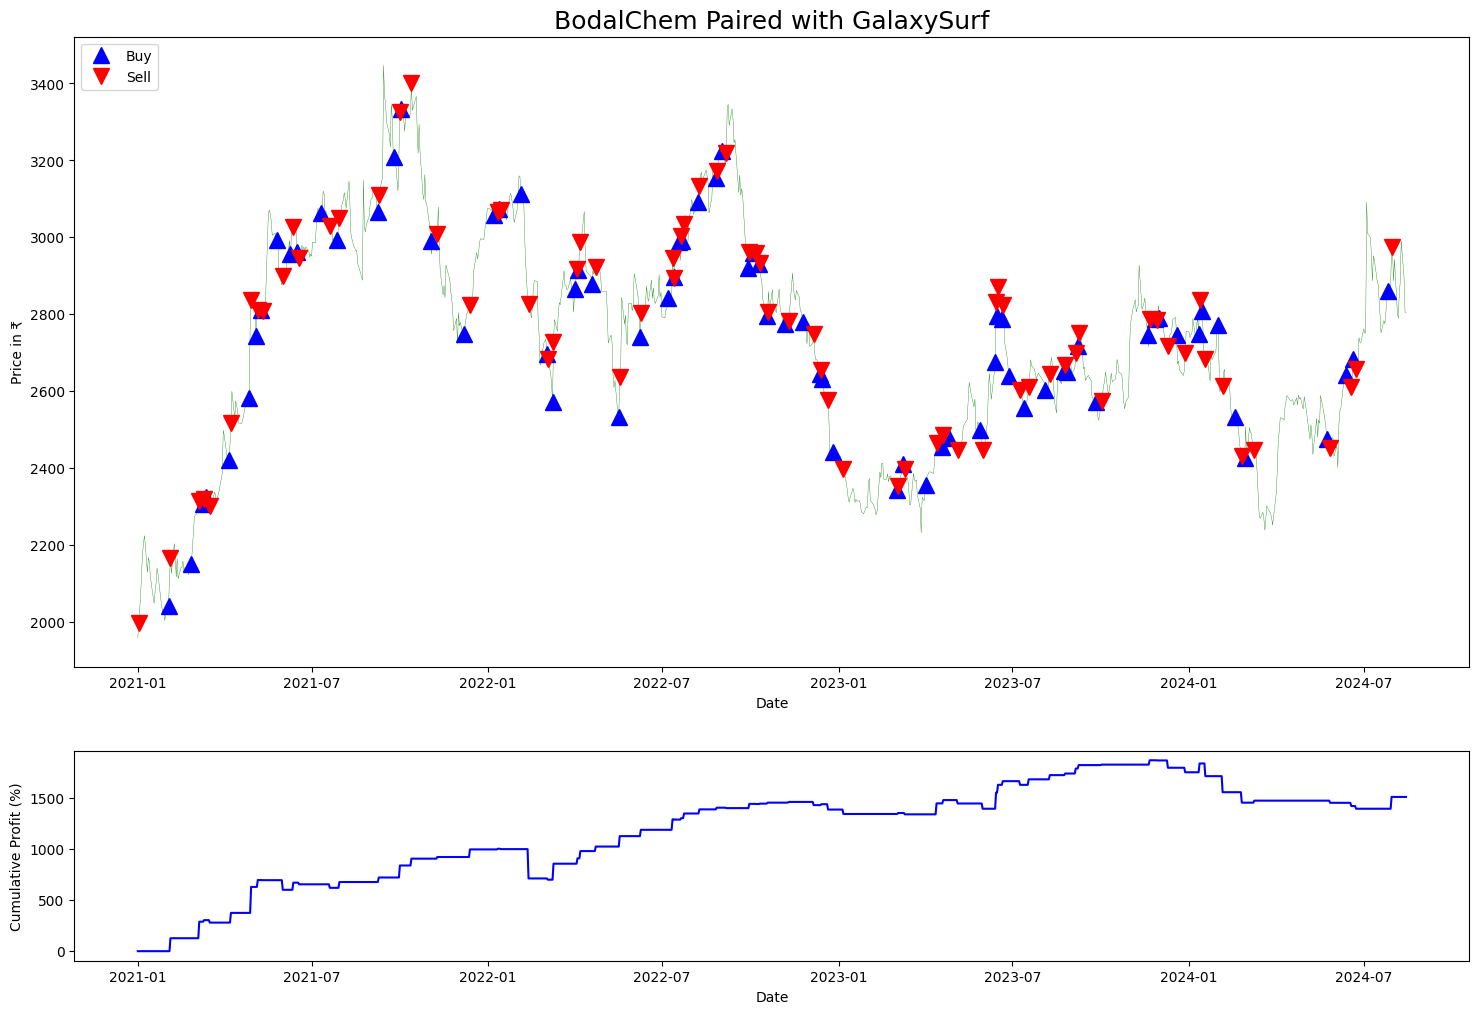

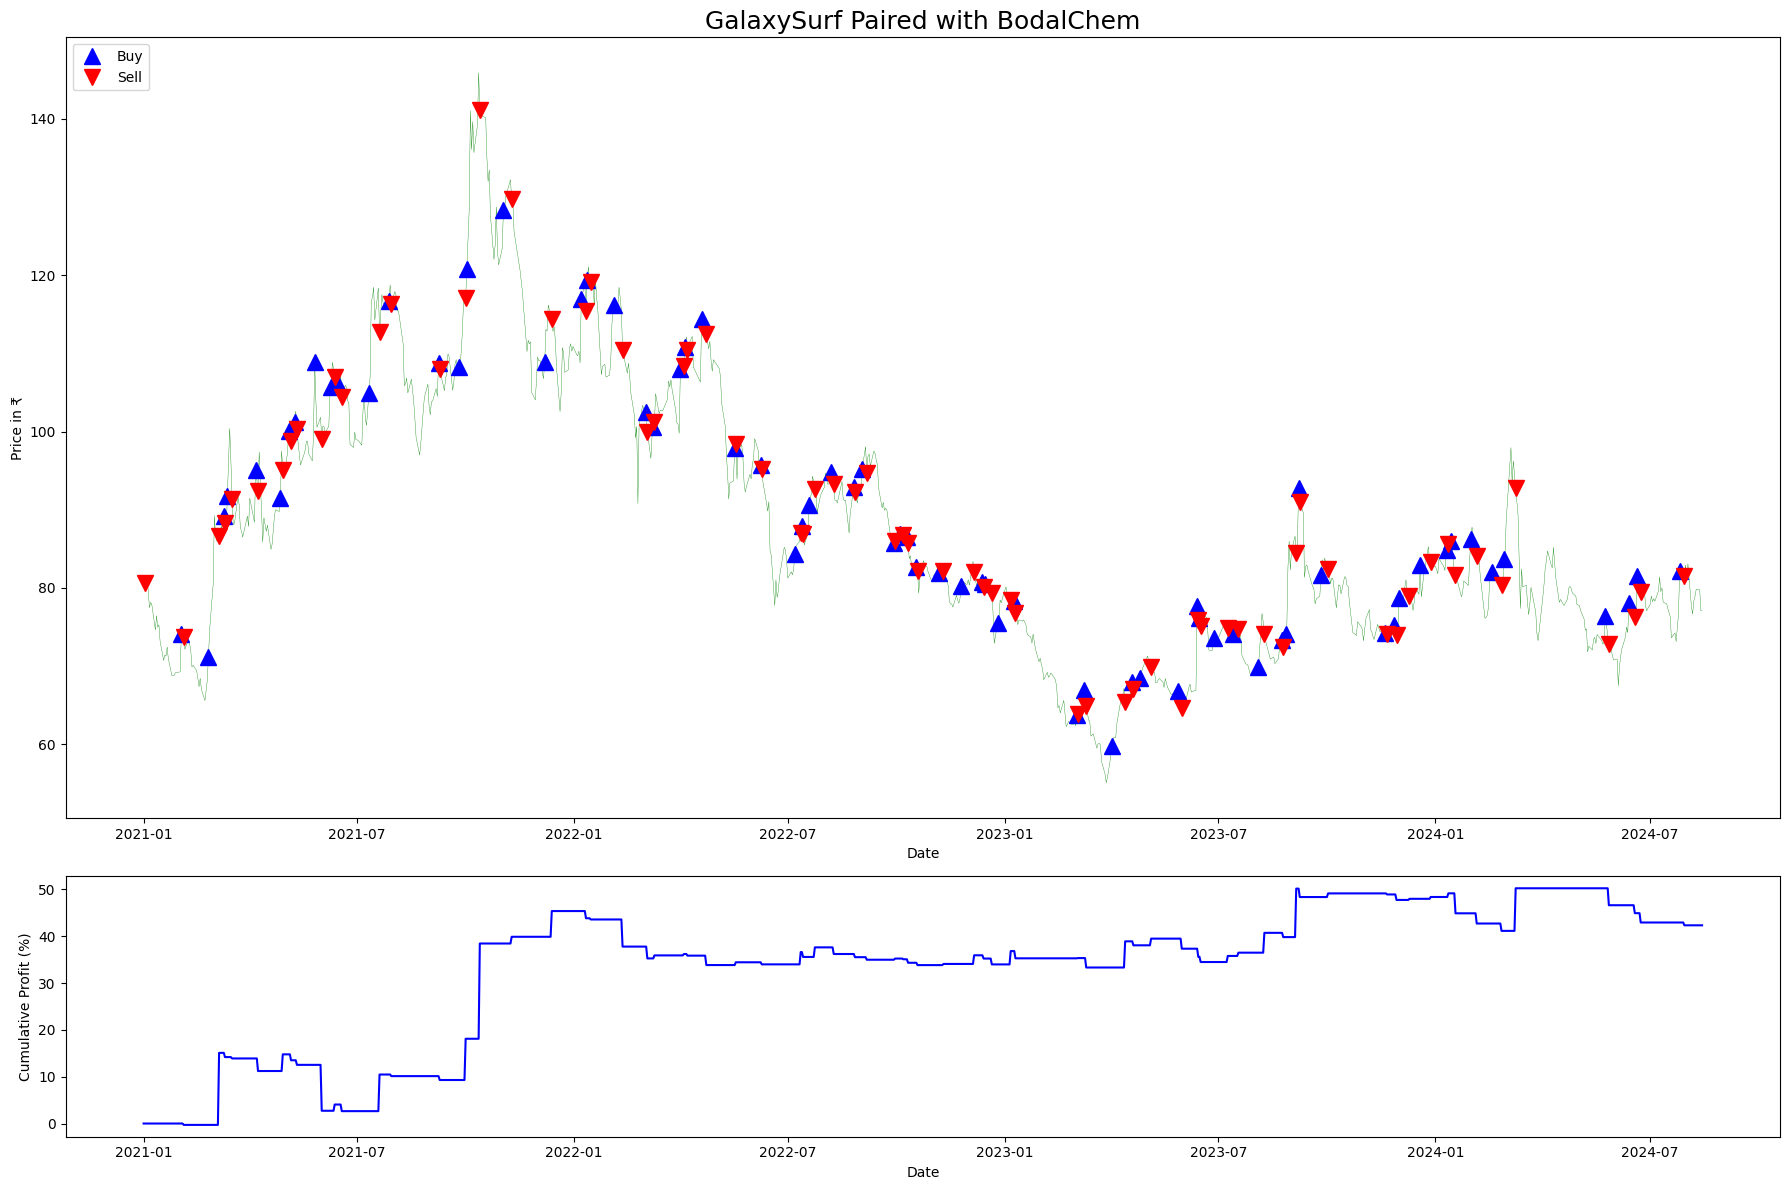

In [35]:
def signals_zscore_evolution(ticker1_ts, ticker2_ts, window_size=15, first_ticker=True):
    """
    Generate trading signals based on z-score analysis of the ratio between two time series.
    Parameters:
    - ticker1_ts (pandas.Series): Time series data for the first security.
    - ticker2_ts (pandas.Series): Time series data for the second security.
    - window_size (int): The window size for calculating z-scores and ratios' statistics.
    - first_ticker (bool): Set to True to use the first ticker as the primary signal source, and False to use the second.Returns:
    - signals_df (pandas.DataFrame): A DataFrame with 'signal' and 'orders' columns containing buy (1) and sell (-1) signals.
    """
    ratios = ticker1_ts / ticker2_ts
    ratios_mean = ratios.rolling(
        window=window_size, min_periods=1, center=False).mean()
    ratios_std = ratios.rolling(
        window=window_size, min_periods=1, center=False).std()
    z_scores = (ratios - ratios_mean) / ratios_std
    buy = ratios.copy()
    sell = ratios.copy()
    if first_ticker:
        # These are empty zones, where there should be no signal
        # the rest is signalled by the ratio.
        buy[z_scores > -1] = 0
        sell[z_scores < 1] = 0
    else:
        buy[z_scores < 1] = 0
        sell[z_scores > -1] = 0
    signals_df = pd.DataFrame(index=ticker1_ts.index)
    signals_df['signal'] = np.where(buy > 0, 1, np.where(sell < 0, -1, 0))
    signals_df['orders'] = signals_df['signal'].diff()
    signals_df.loc[signals_df['orders'] == 0, 'orders'] = None
    return signals_df

G = uts_sanitized["GALAXYSURF.BO"]["Adj Close"]
B = uts_sanitized["BODALCHEM.BO"]["Adj Close"]
plt.figure(figsize=(50, 18))
signals_df1 = signals_zscore_evolution(G, B)
profit_df1 = calculate_profit(signals_df1, G)
ax1, _ = plot_strategy(G, signals_df1, profit_df1)
signals_df2 = signals_zscore_evolution(B, G, first_ticker=False)
profit_df2 = calculate_profit(signals_df2, B)
ax2, _ = plot_strategy(B, signals_df2, profit_df2)
ax1.legend(loc='upper left', fontsize=10)
ax1.set_title(f'BodalChem Paired with GalaxySurf', fontsize=18)
ax2.legend(loc='upper left', fontsize=10)
ax2.set_title(f'GalaxySurf Paired with BodalChem', fontsize=18)
plt.tight_layout()
plt.show()


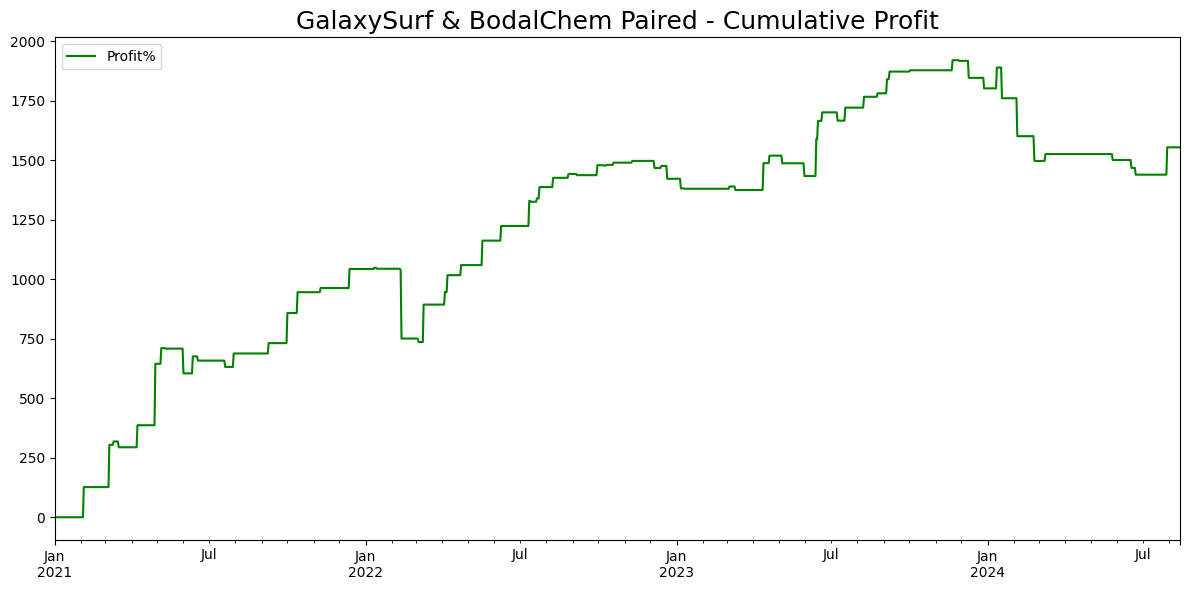

In [36]:
plt.figure(figsize=(12, 6))
cumulative_profit_combined = profit_df1 + profit_df2
ax2_combined = cumulative_profit_combined.plot(
    label='Profit%', color='green')
plt.legend(loc='upper left', fontsize=10)
plt.title(f'GalaxySurf & BodalChem Paired - Cumulative Profit', fontsize=18)
plt.tight_layout()
plt.show()

#We can see that over a long amount of time such as 3-3.5 years, Our technique performs extremely well upon calculating cumulative gains.
## We can see an almost 2000% on paper profit for long term trading using this strategy.


#We Next try to evaluate the Pairwise Trading Strategy on a shorter scale of time and this time we collect hourly stock data.

In [37]:
def load_ticker_ts_df(ticker, start_date, end_date):
    """
    Load and cache time series financial data from Yahoo Finance API.
    Parameters:
    - ticker (str): The stock ticker symbol (e.g., 'AAPL' for Apple Inc.).
    - start_date (str): The start date in 'YYYY-MM-DD' format for data retrieval.
    - end_date (str): The end date in 'YYYY-MM-DD' format for data retrieval.
    Returns:
    - df (pandas.DataFrame): A DataFrame containing the financial time series data."""
    dir_path = './data'
    cached_file_path = f'{dir_path}/{ticker}_{start_date}_{end_date}.pkl'
    try:
        if 0==1:
            print('yay')
        else:
            df = yf.download(ticker, start=start_date, end=end_date, interval="60m")
            if not os.path.exists(dir_path):
                os.makedirs(dir_path)
            df.to_pickle(cached_file_path)
    except FileNotFoundError:
        print(
            f'Error downloading and caching or loading file with ticker: {ticker}')
    return df

In [38]:
START_DATE = '2024-07-14'
END_DATE = '2024-08-14'

bo_tickers_ts_map = {ticker: load_ticker_ts_df(
    ticker, START_DATE, END_DATE) for ticker in bo_tickers}

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [39]:
bo_tickers_ts_map

{'ALKEM.BO':                             Open         High          Low        Close  \
 Datetime                                                                  
 2024-07-15 09:15:00  5246.200195  5385.399902  5245.000000  5384.500000   
 2024-07-15 10:15:00  5377.049805  5414.600098  5352.799805  5367.600098   
 2024-07-15 11:15:00  5366.450195  5451.899902  5366.450195  5403.350098   
 2024-07-15 12:15:00  5402.450195  5404.250000  5356.700195  5356.700195   
 2024-07-15 13:15:00  5366.799805  5404.899902  5355.000000  5395.600098   
 ...                          ...          ...          ...          ...   
 2024-08-13 11:15:00  5751.850098  5753.750000  5727.750000  5736.600098   
 2024-08-13 12:15:00  5725.549805  5728.350098  5697.149902  5711.850098   
 2024-08-13 13:15:00  5714.549805  5731.600098  5687.049805  5704.950195   
 2024-08-13 14:15:00  5707.200195  5715.700195  5675.000000  5705.049805   
 2024-08-13 15:15:00  5703.549805  5719.000000  5682.450195  5682.450195   


In [40]:
import pandas as pd
import numpy as np

def sanitize_data(data_map):
    # Define the trading calendar: excluding weekends
    date_range = bo_tickers_ts_map['ALKEM.BO'].index
    data_sanitized = {}
    for ticker, data in bo_tickers_ts_map.items():
        print(len(data))
        if data is None or len(data) < len(date_range) / 2:
            continue
        data = data.reindex(date_range)
        data['Adj Close'].replace([np.inf, -np.inf], np.nan, inplace=True)
        data['Adj Close'].interpolate(method='linear', inplace=True)
        data['Adj Close'] = data['Adj Close'].ffill().bfill()
        print(ticker, data['Adj Close'])
        assert not np.any(np.isnan(data['Adj Close'])) and not np.any(np.isinf(data['Adj Close']))
        data_sanitized[ticker] = data
        print(data_sanitized)

    return data_sanitized

In [41]:
uts_sanitized = sanitize_data(bo_tickers_ts_map)

Streaming output truncated to the last 5000 lines.
[147 rows x 6 columns], 'ABFRL.BO':                            Open        High         Low       Close  \
Datetime                                                              
2024-07-15 09:15:00  325.000000  325.500000  321.100006  322.000000   
2024-07-15 10:15:00  322.000000  322.350006  319.299988  320.649994   
2024-07-15 11:15:00  321.000000  321.250000  320.299988  321.049988   
2024-07-15 12:15:00  321.000000  324.000000  320.450012  321.950012   
2024-07-15 13:15:00  322.000000  323.700012  321.500000  322.250000   
...                         ...         ...         ...         ...   
2024-08-13 11:15:00  322.100006  322.100006  320.000000  320.950012   
2024-08-13 12:15:00  320.750000  322.100006  319.000000  319.000000   
2024-08-13 13:15:00  319.350006  319.600006  317.000000  318.299988   
2024-08-13 14:15:00  318.000000  318.200012  312.399994  312.700012   
2024-08-13 15:15:00  312.700012  312.700012  309.450012  312.

In [42]:
for ticker, data in uts_sanitized.items():
    print(ticker, len(data))

ALKEM.BO 147
AKZOINDIA.BO 147
AJANTPHARM.BO 147
AIIL.BO 147
AIAENG.BO 147
AFFLE.BO 147
AETHER.BO 147
AEGISLOG.BO 147
ADANIPOWER.BO 147
ADANIPORTS.BO 147
ADANIGREEN.BO 147
ADANIENT.BO 147
ADANIENSOL.BO 147
ACE.BO 147
ACC.BO 147
ABSLAMC.BO 147
ABFRL.BO 147
ABCAPITAL.BO 147
ABBOTINDIA.BO 147
ABB.BO 147
AAVAS.BO 147
AARTIIND.BO 147
AADHARHFC.BO 147
3MINDIA.BO 147
360ONE.BO 147
CMSINFO.BO 147
SBFC.BO 147
MAHLIFE.BO 147
TIPSINDLTD.BO 147
LEMONTREE.BO 147
SAMMAANCAP.BO 147
JKLAKSHMI.BO 147
AZAD.BO 147
AVANTIFEED.BO 147
ESABINDIA.BO 147
SAREGAMA.BO 147
GNFC.BO 147
ITDCEM.BO 147
MARKSANS.BO 147
KNRCON.BO 147
ROUTE.BO 147
BIRLACORPN.BO 147
VESUVIUS.BO 147
TEXRAIL.BO 147
SAPPHIRE.BO 147
RENUKA.BO 147
NETWORK18.BO 147
SFL.BO 147
GALAXYSURF.BO 147
HGINFRA.BO 147
CIFL.BO 147
JAYAGROGN.BO 147
BODALCHEM.BO 147
THEINVEST.BO 147
ESSARSHPNG.BO 147
VISAKAIND.BO 147
FOODSIN.BO 147
SRHHYPOLTD.BO 147
JAGSNPHARM.BO 147
GANDHITUBE.BO 147
WSI.BO 147
ENIL.BO 147
TRACXN.BO 147
HARDWYN.BO 147
SILVERTUC.BO 147
ZUAR

In [43]:
P_VALUE_THRESHOLD = 0.02
pvalues1, pairs1 = find_cointegrated_pairs(
    uts_sanitized, p_value_threshold=P_VALUE_THRESHOLD)

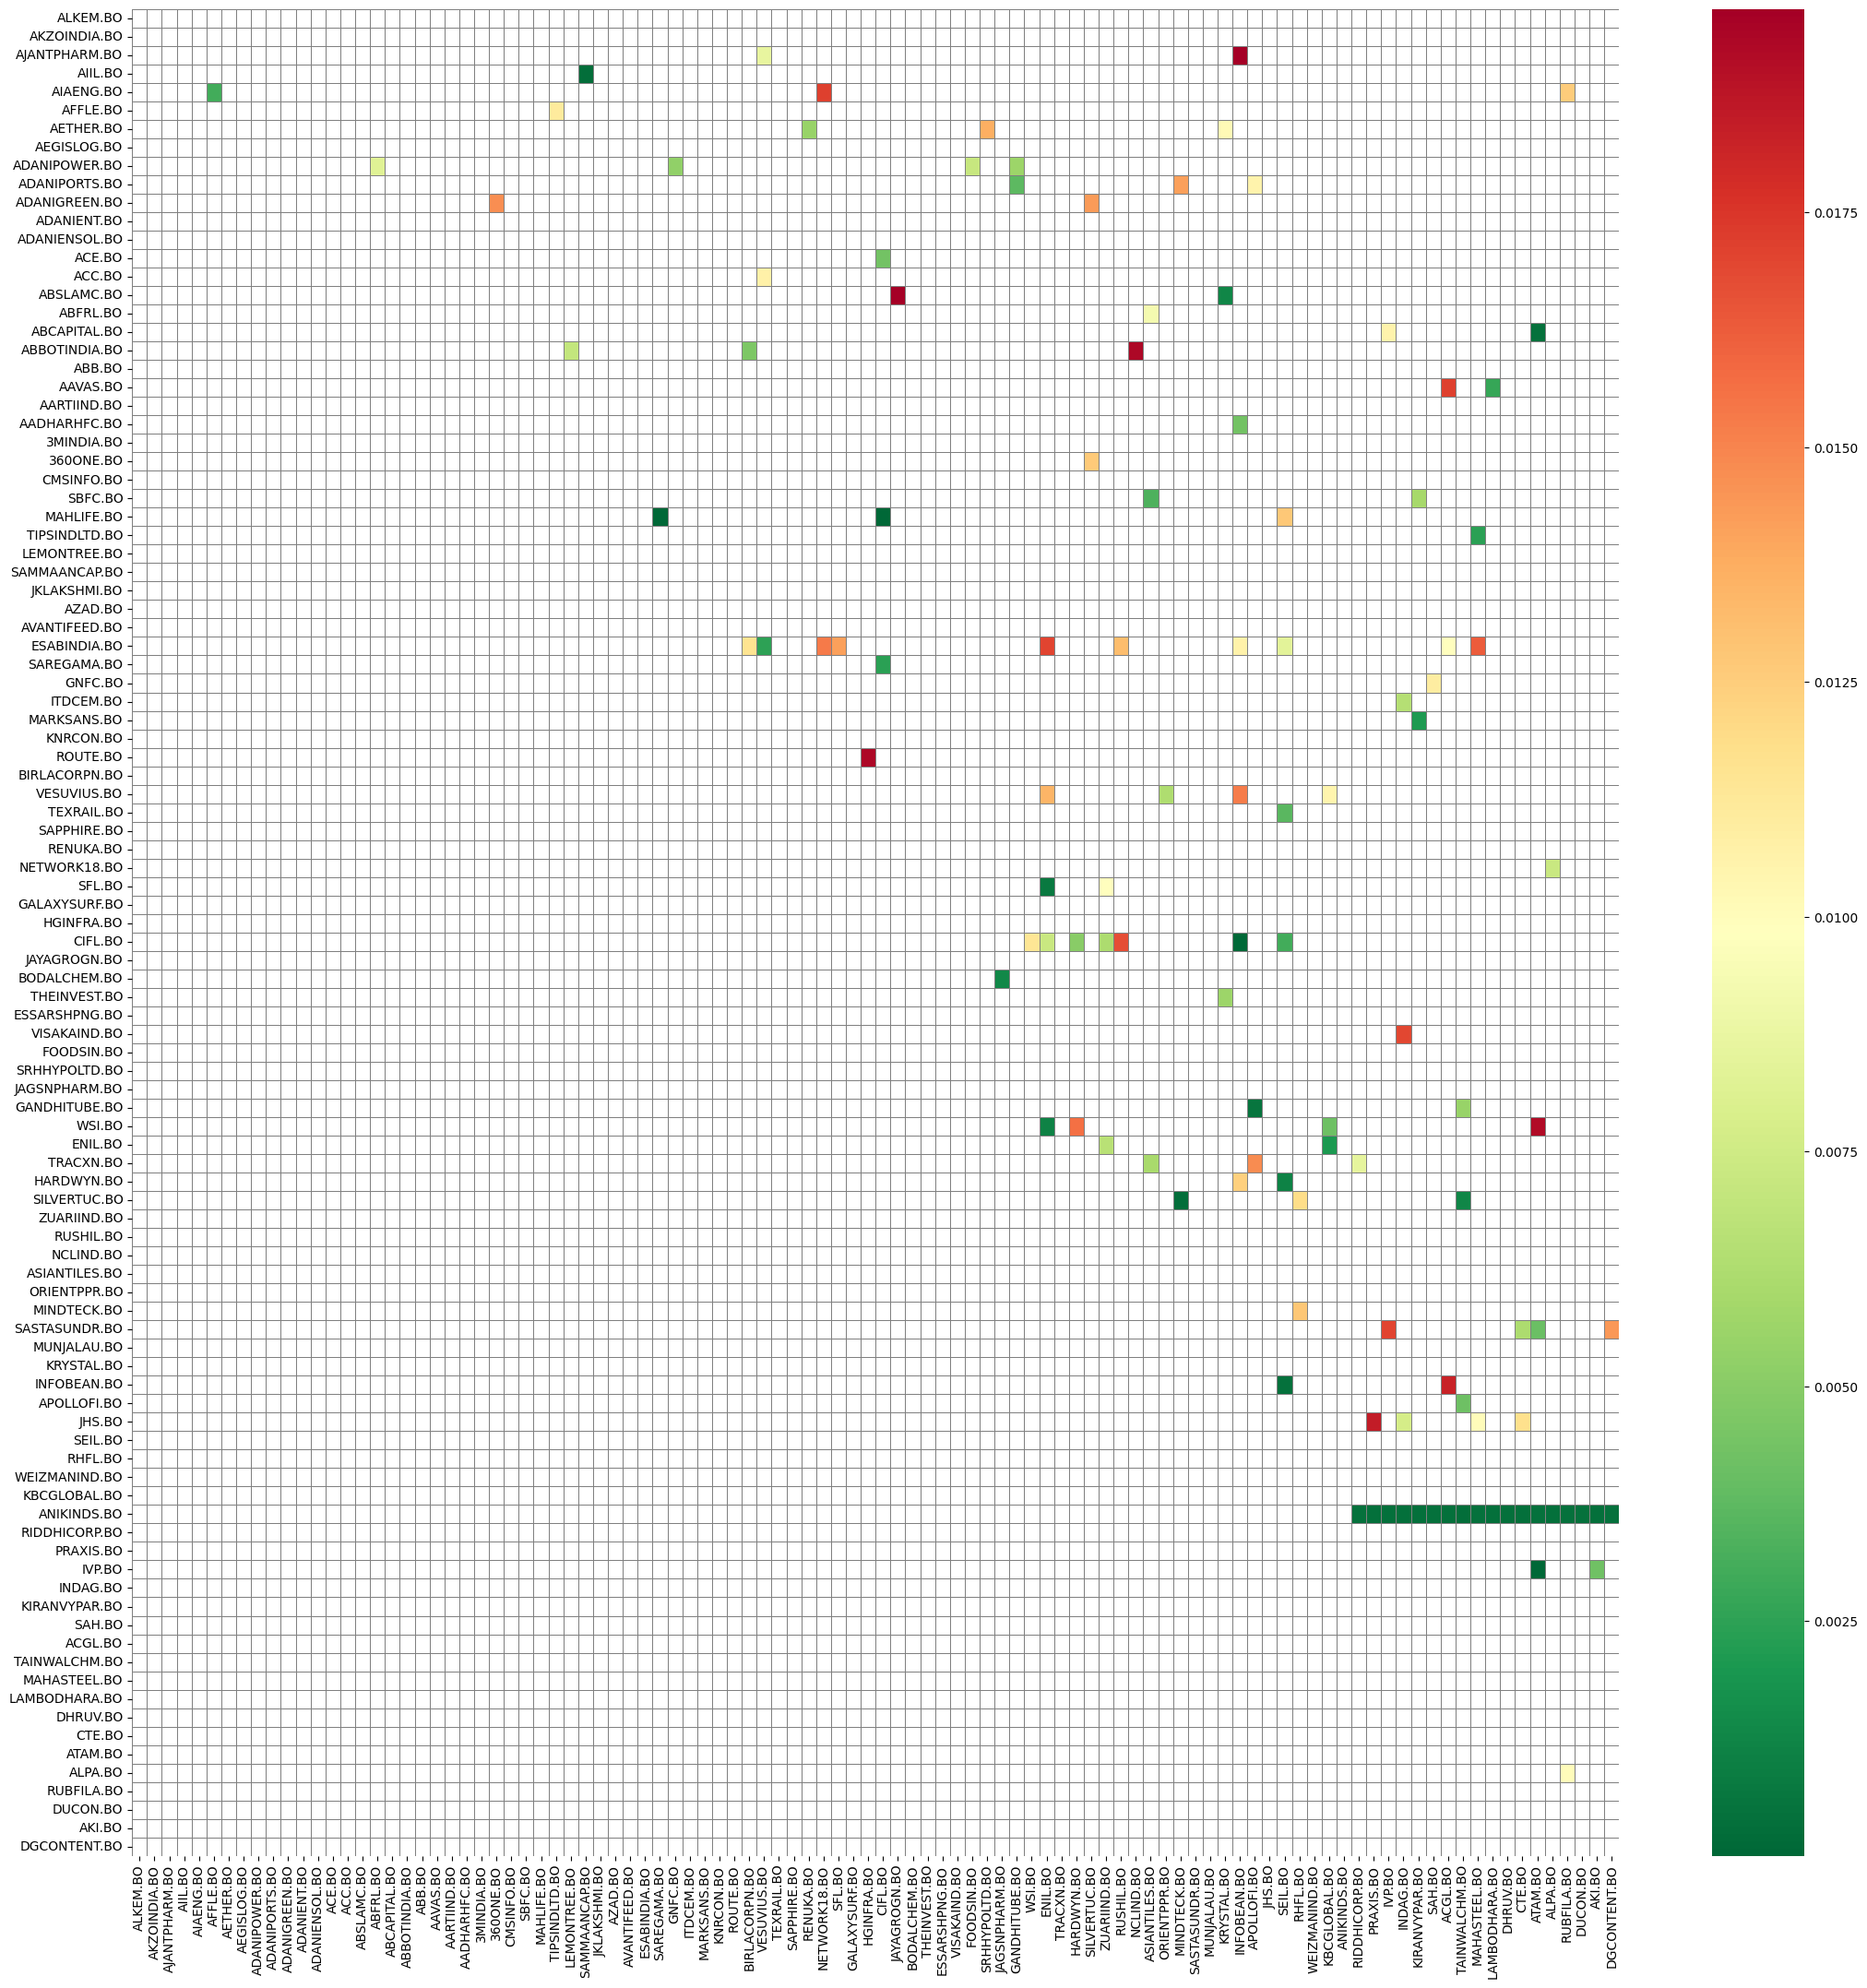

In [44]:
plt.figure(figsize=(26, 26))
heatmap = sns.heatmap(pvalues1, xticklabels=uts_sanitized.keys(),
                      yticklabels=uts_sanitized.keys(), cmap='RdYlGn_r',
                      mask=(pvalues1 > (P_VALUE_THRESHOLD)),
                      linecolor='gray', linewidths=0.5)
heatmap.set_xticklabels(heatmap.get_xticklabels(), size=10)
heatmap.set_yticklabels(heatmap.get_yticklabels(), size=10)
plt.show()

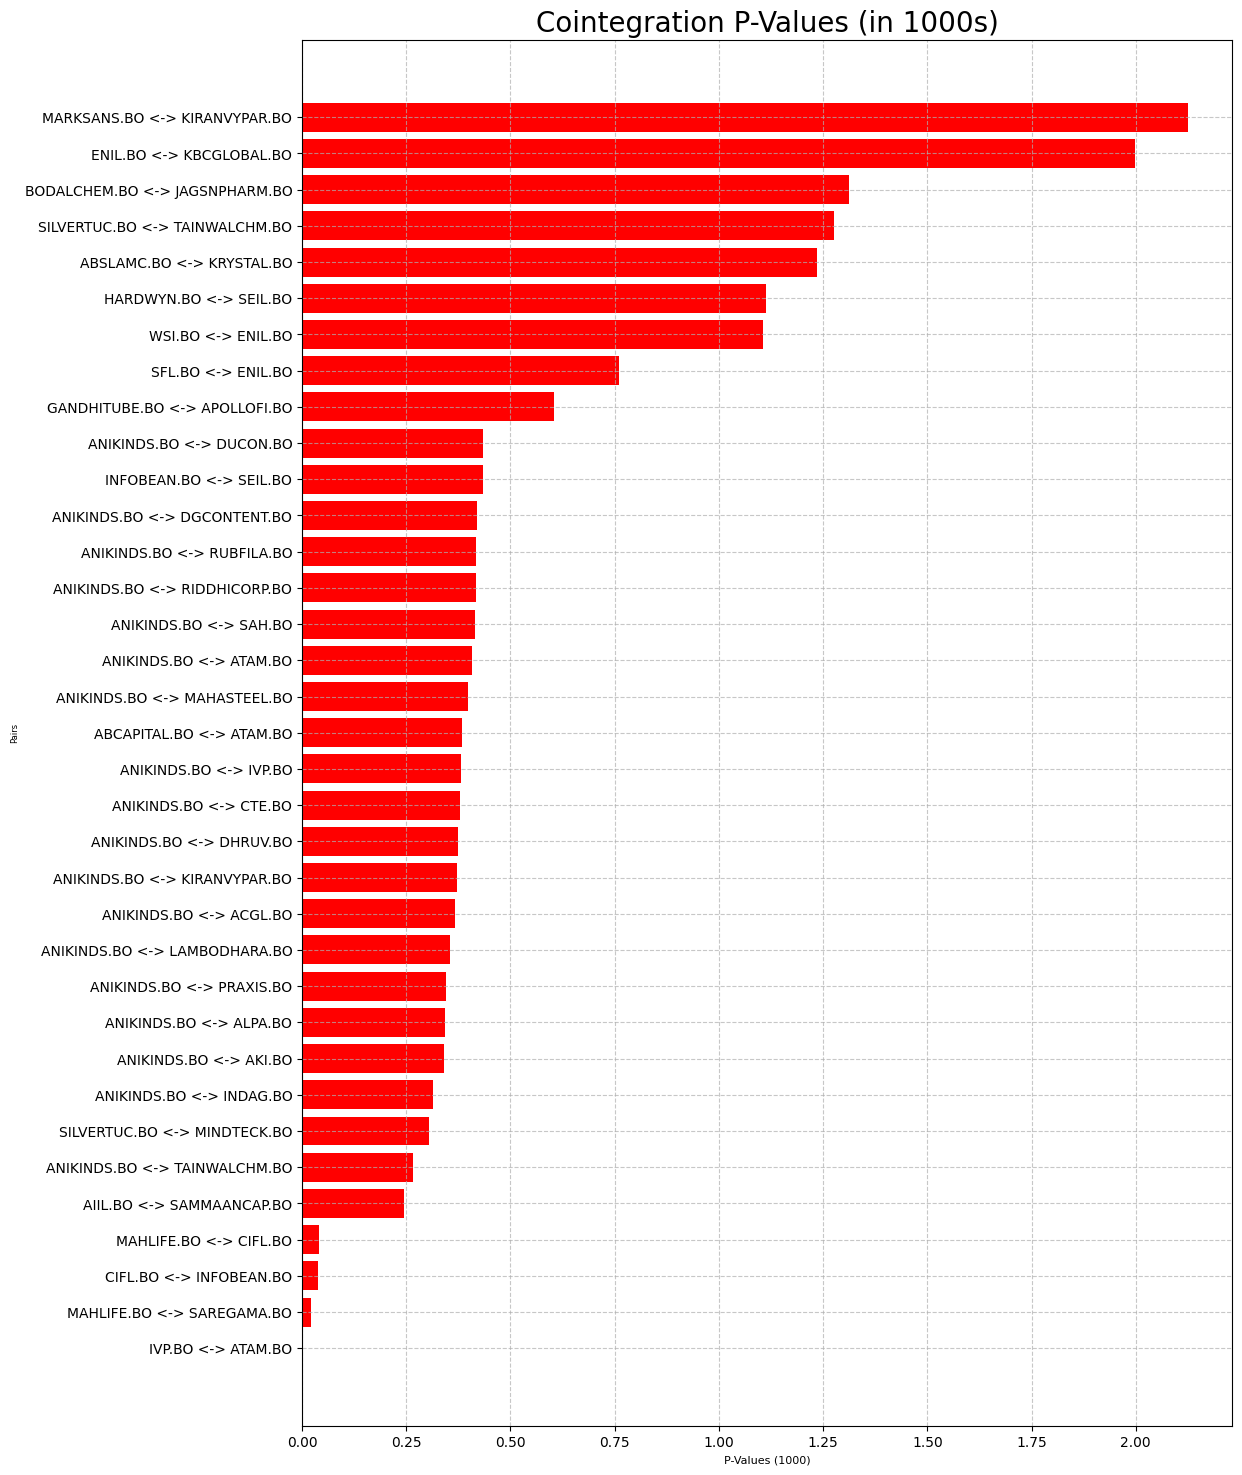

In [45]:
sorted_pairs = sorted(pairs1, key=lambda x: x[2], reverse=False)
sorted_pairs = sorted_pairs[0:35]
sorted_pairs_labels, pairs_p_values = zip(
    *[(f'{y1} <-> {y2}', p*1000) for y1, y2, p in sorted_pairs])
plt.figure(figsize=(12, 18))
plt.barh(sorted_pairs_labels,
         pairs_p_values, color='red')
plt.xlabel('P-Values (1000)', fontsize=8)
plt.ylabel('Pairs', fontsize=6)
plt.title('Cointegration P-Values (in 1000s)', fontsize=20)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

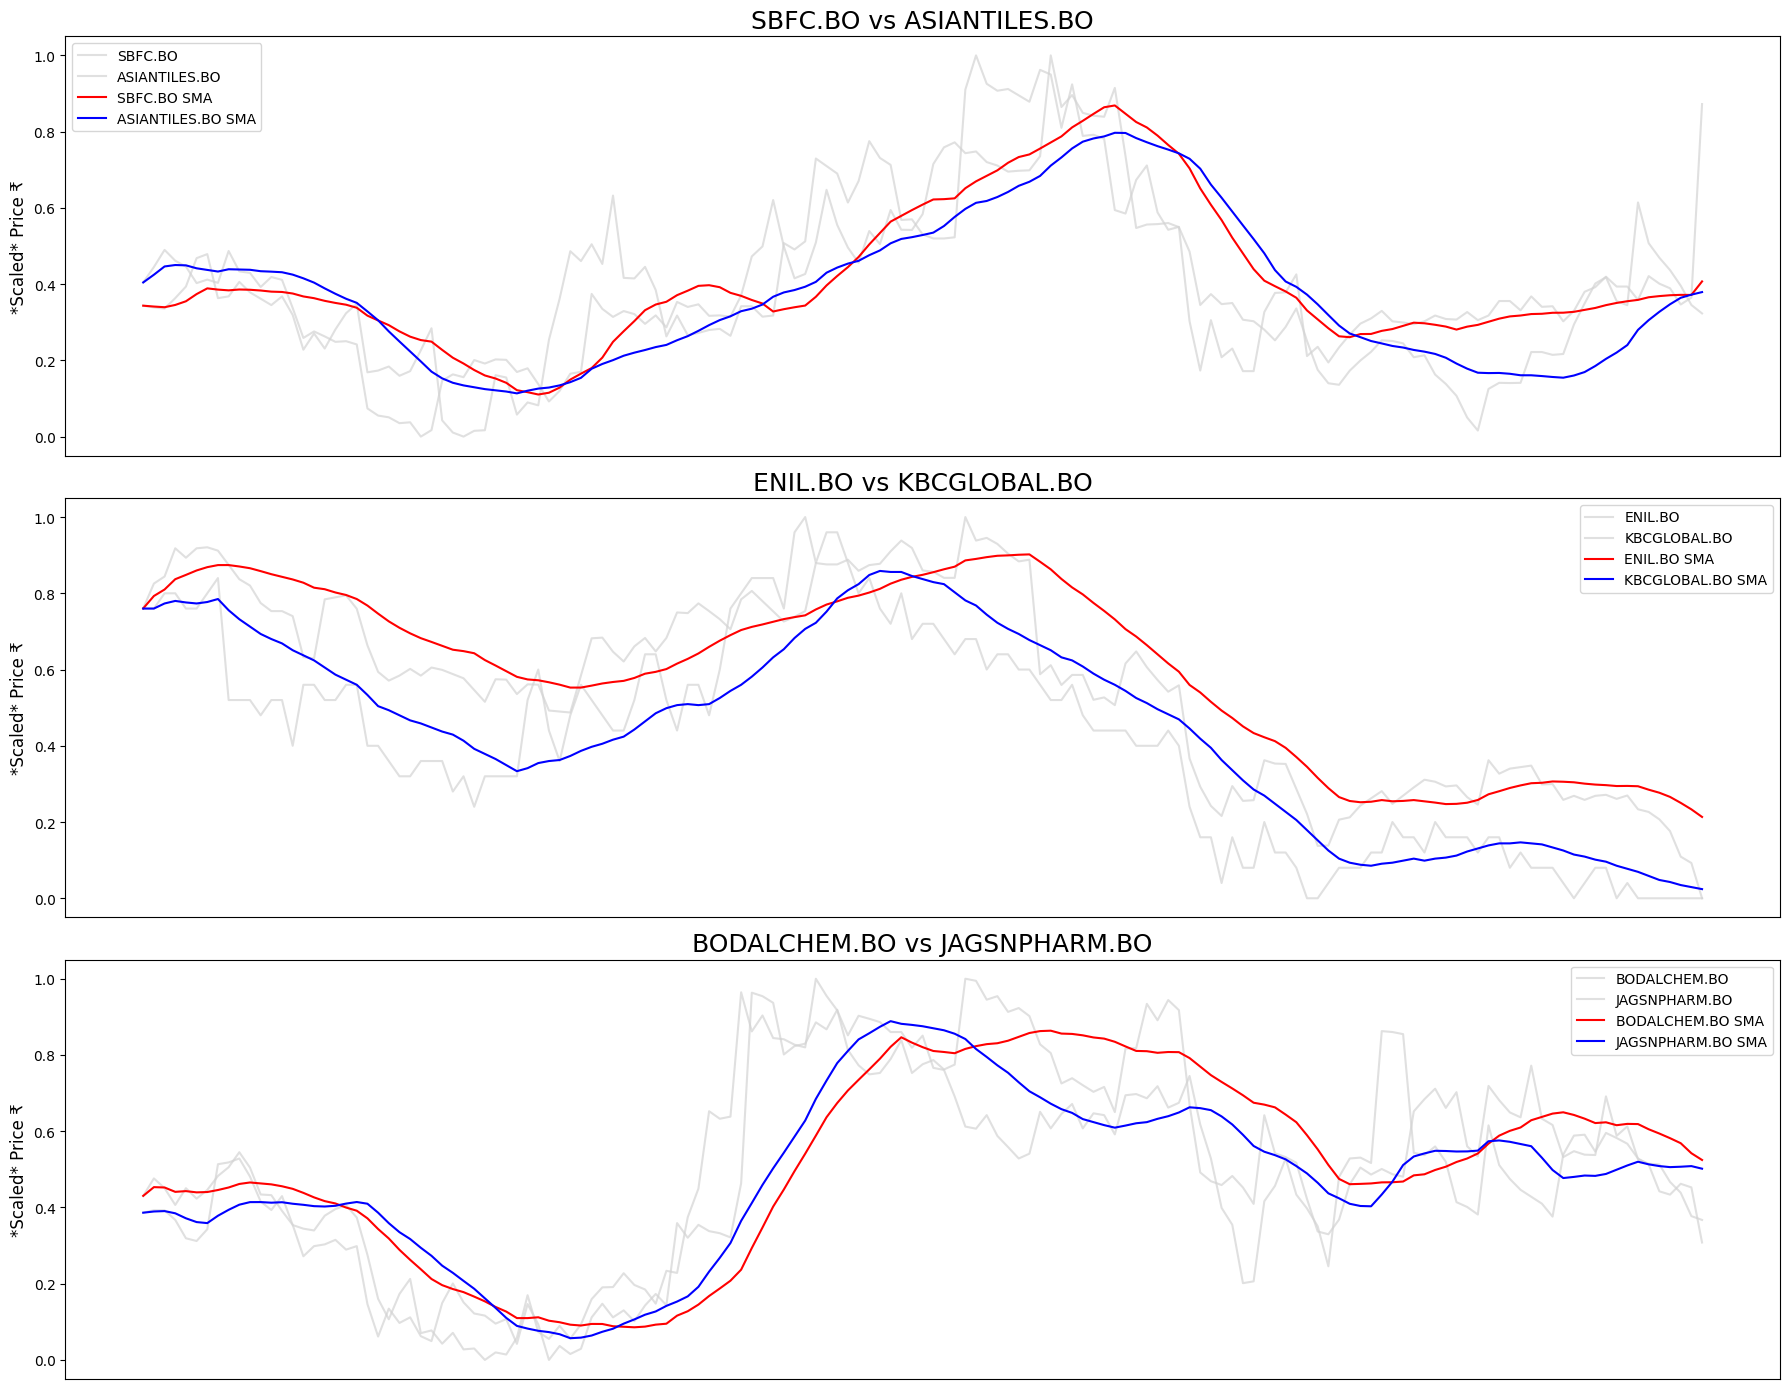

In [46]:
from sklearn.preprocessing import MinMaxScaler

ticker_pairs = [("SBFC.BO", "ASIANTILES.BO"), ("ENIL.BO", "KBCGLOBAL.BO"), ("BODALCHEM.BO", "JAGSNPHARM.BO")]
fig, axs = plt.subplots(3, 1, figsize=(18, 14))
scaler = MinMaxScaler()
for i, (ticker1, ticker2) in enumerate(ticker_pairs):
    # Scale the price data for each pair using MIN MAX
    scaled_data1 = scaler.fit_transform(
        uts_sanitized[ticker1]['Adj Close'].values.reshape(-1, 1))
    scaled_data2 = scaler.fit_transform(
        uts_sanitized[ticker2]['Adj Close'].values.reshape(-1, 1))
    axs[i].plot(scaled_data1, label=f'{ticker1}', color='lightgray', alpha=0.7)
    axs[i].plot(scaled_data2, label=f'{ticker2}', color='lightgray', alpha=0.7)
    # Apply rolling mean with a window of 15
    scaled_data1_smooth = pd.Series(scaled_data1.flatten()).rolling(
        window=15, min_periods=1).mean()
    scaled_data2_smooth = pd.Series(scaled_data2.flatten()).rolling(
        window=15, min_periods=1).mean()
    axs[i].plot(scaled_data1_smooth, label=f'{ticker1} SMA', color='red')
    axs[i].plot(scaled_data2_smooth, label=f'{ticker2} SMA', color='blue')
    axs[i].set_ylabel('*Scaled* Price ₹', fontsize=12)
    axs[i].set_title(f'{ticker1} vs {ticker2}', fontsize=18)
    axs[i].legend()
    axs[i].set_xticks([])
plt.tight_layout()
plt.show()

In [47]:
def plot_pr_zs(ticker1, ticker2):
    TRAIN = int(len(uts_sanitized[ticker1]) * 0.85)
    TEST = len(uts_sanitized[ticker1]) - TRAIN

    G_ts = uts_sanitized[ticker1]["Adj Close"][:TRAIN]
    B_ts = uts_sanitized[ticker2]["Adj Close"][:TRAIN]

    ratios = B_ts/G_ts
    fig, ax = plt.subplots(figsize=(12, 8))
    ratios_mean = np.mean(ratios)
    ratios_std = np.std(ratios)
    ratios_zscore = (ratios - ratios_mean) / ratios_std
    ax.plot(ratios.index, ratios_zscore, label="Z-Score", color='blue')
    # Plot reference lines
    ax.axhline(1.0, color="green", linestyle='--', label="Upper Threshold (1.0)")
    ax.axhline(-1.0, color="red", linestyle='--', label="Lower Threshold (-1.0)")
    ax.axhline(0, color="black", linestyle='--', label="Mean")
    ax.set_title(ticker1+ " / "+ ticker2+ ': Price Ratio and Z-Score', fontsize=18)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price Ratio / Z-Score')
    ax.legend()
    plt.tight_layout()
    plt.show()

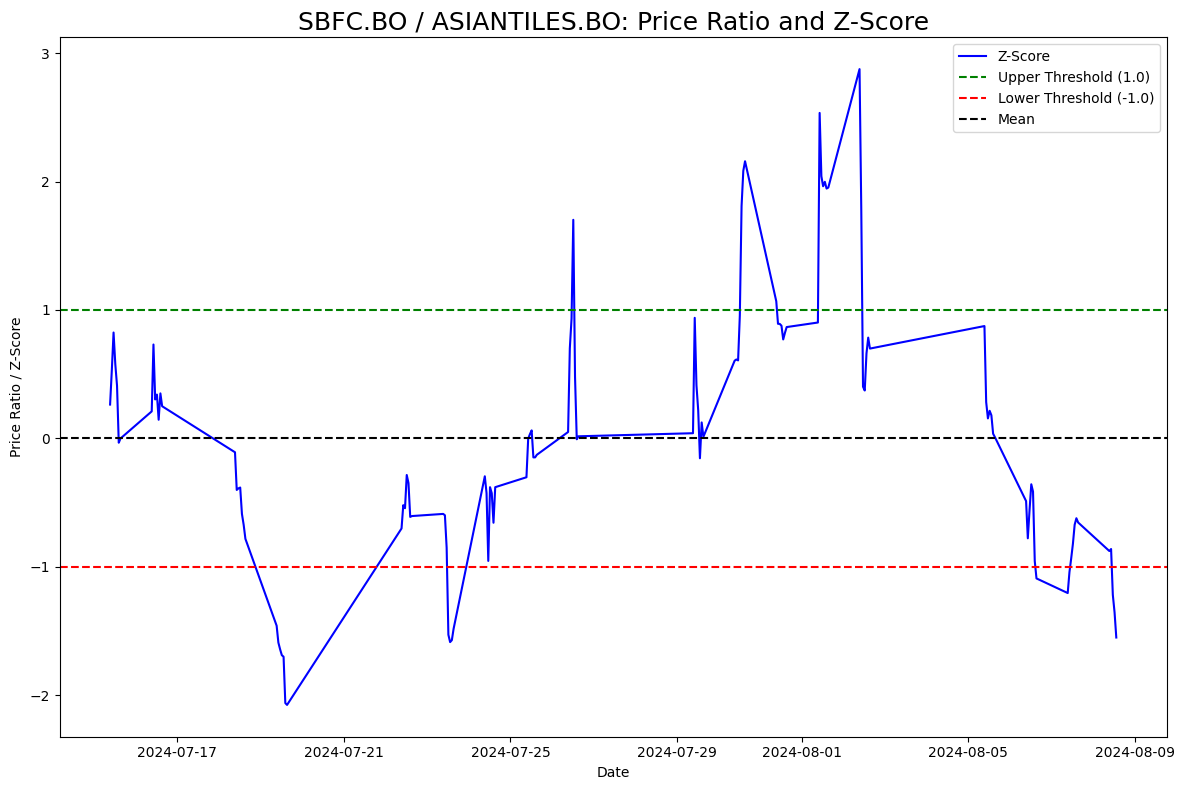

In [48]:
plot_pr_zs('SBFC.BO', 'ASIANTILES.BO')

In [55]:
def pairwise_analysis(ticker1, ticker2):
    G = uts_sanitized[ticker1]["Adj Close"]
    B = uts_sanitized[ticker2]["Adj Close"]
    plt.figure(figsize=(50, 18))
    signals_df1 = signals_zscore_evolution(G, B)
    profit_df1 = calculate_profit(signals_df1, G)
    ax1, _ = plot_strategy(G, signals_df1, profit_df1)
    signals_df2 = signals_zscore_evolution(B, G, first_ticker=False)
    profit_df2 = calculate_profit(signals_df2, B)
    ax2, _ = plot_strategy(B, signals_df2, profit_df2)
    ax1.legend(loc='upper left', fontsize=10)
    ax1.set_title(ticker1 + " paired with " + ticker2, fontsize=18)
    ax2.legend(loc='upper left', fontsize=10)
    ax2.set_title(ticker2 + " paired with " + ticker1, fontsize=18)
    plt.tight_layout()
    plt.show()
    plt.figure(figsize=(12, 6))
    cumulative_profit_combined = profit_df1 + profit_df2
    ax2_combined = cumulative_profit_combined.plot(
        label='Profit%', color='green')
    plt.legend(loc='upper left', fontsize=10)
    plt.title(ticker1 + " & " + ticker2 + ' - Cumulative Profit', fontsize=18)
    plt.tight_layout()
    plt.show()

<Figure size 5000x1800 with 0 Axes>

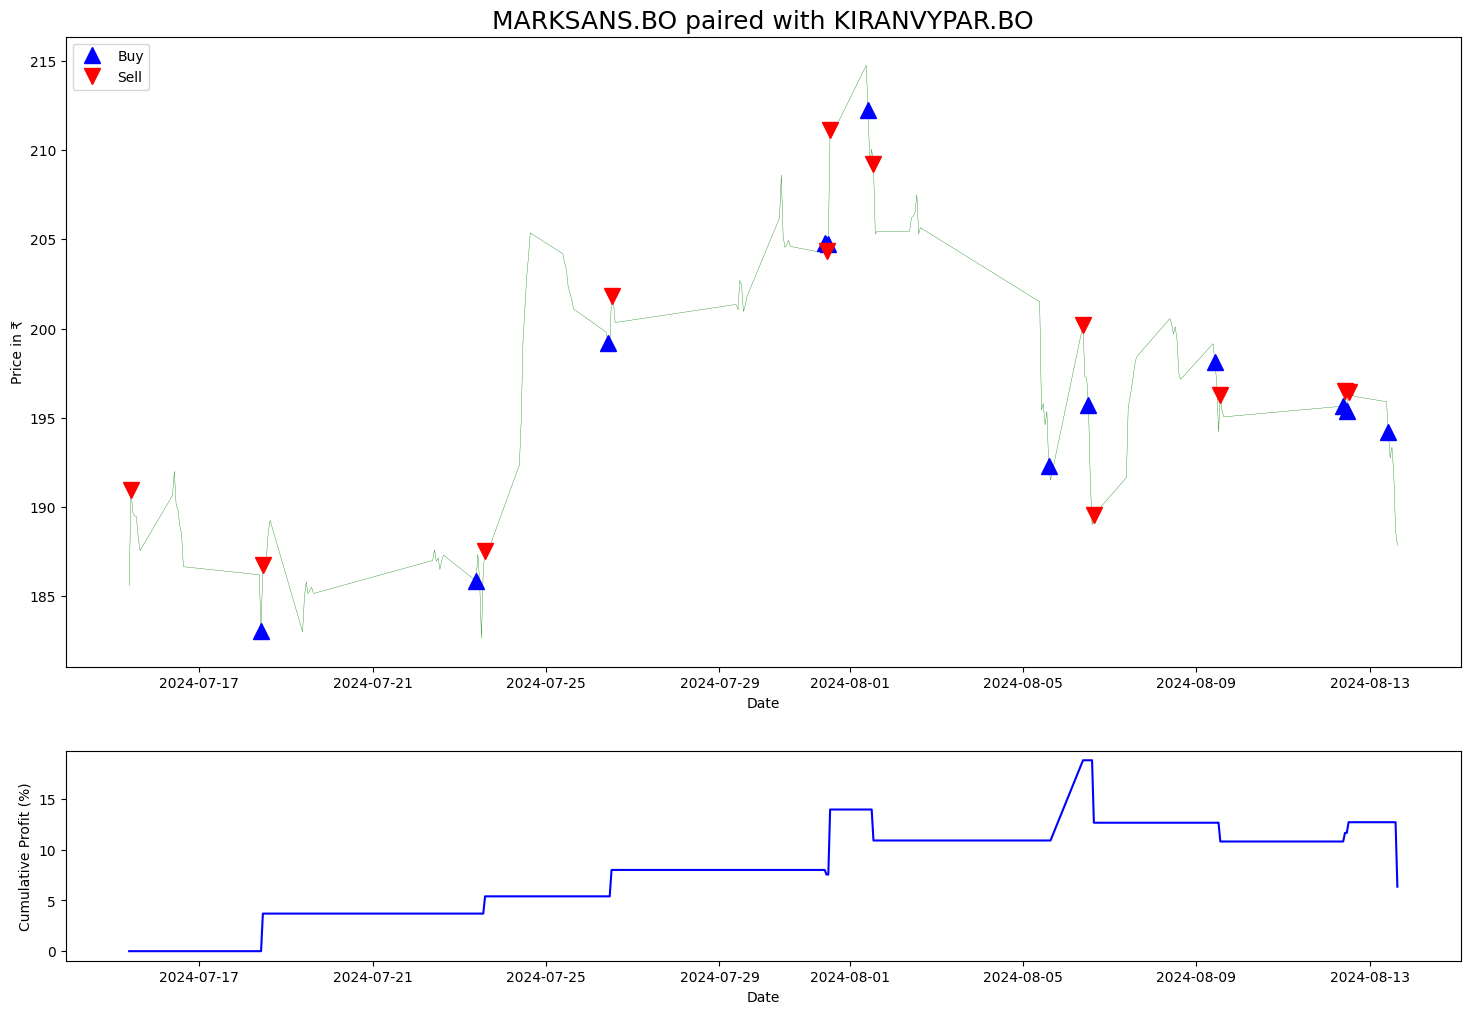

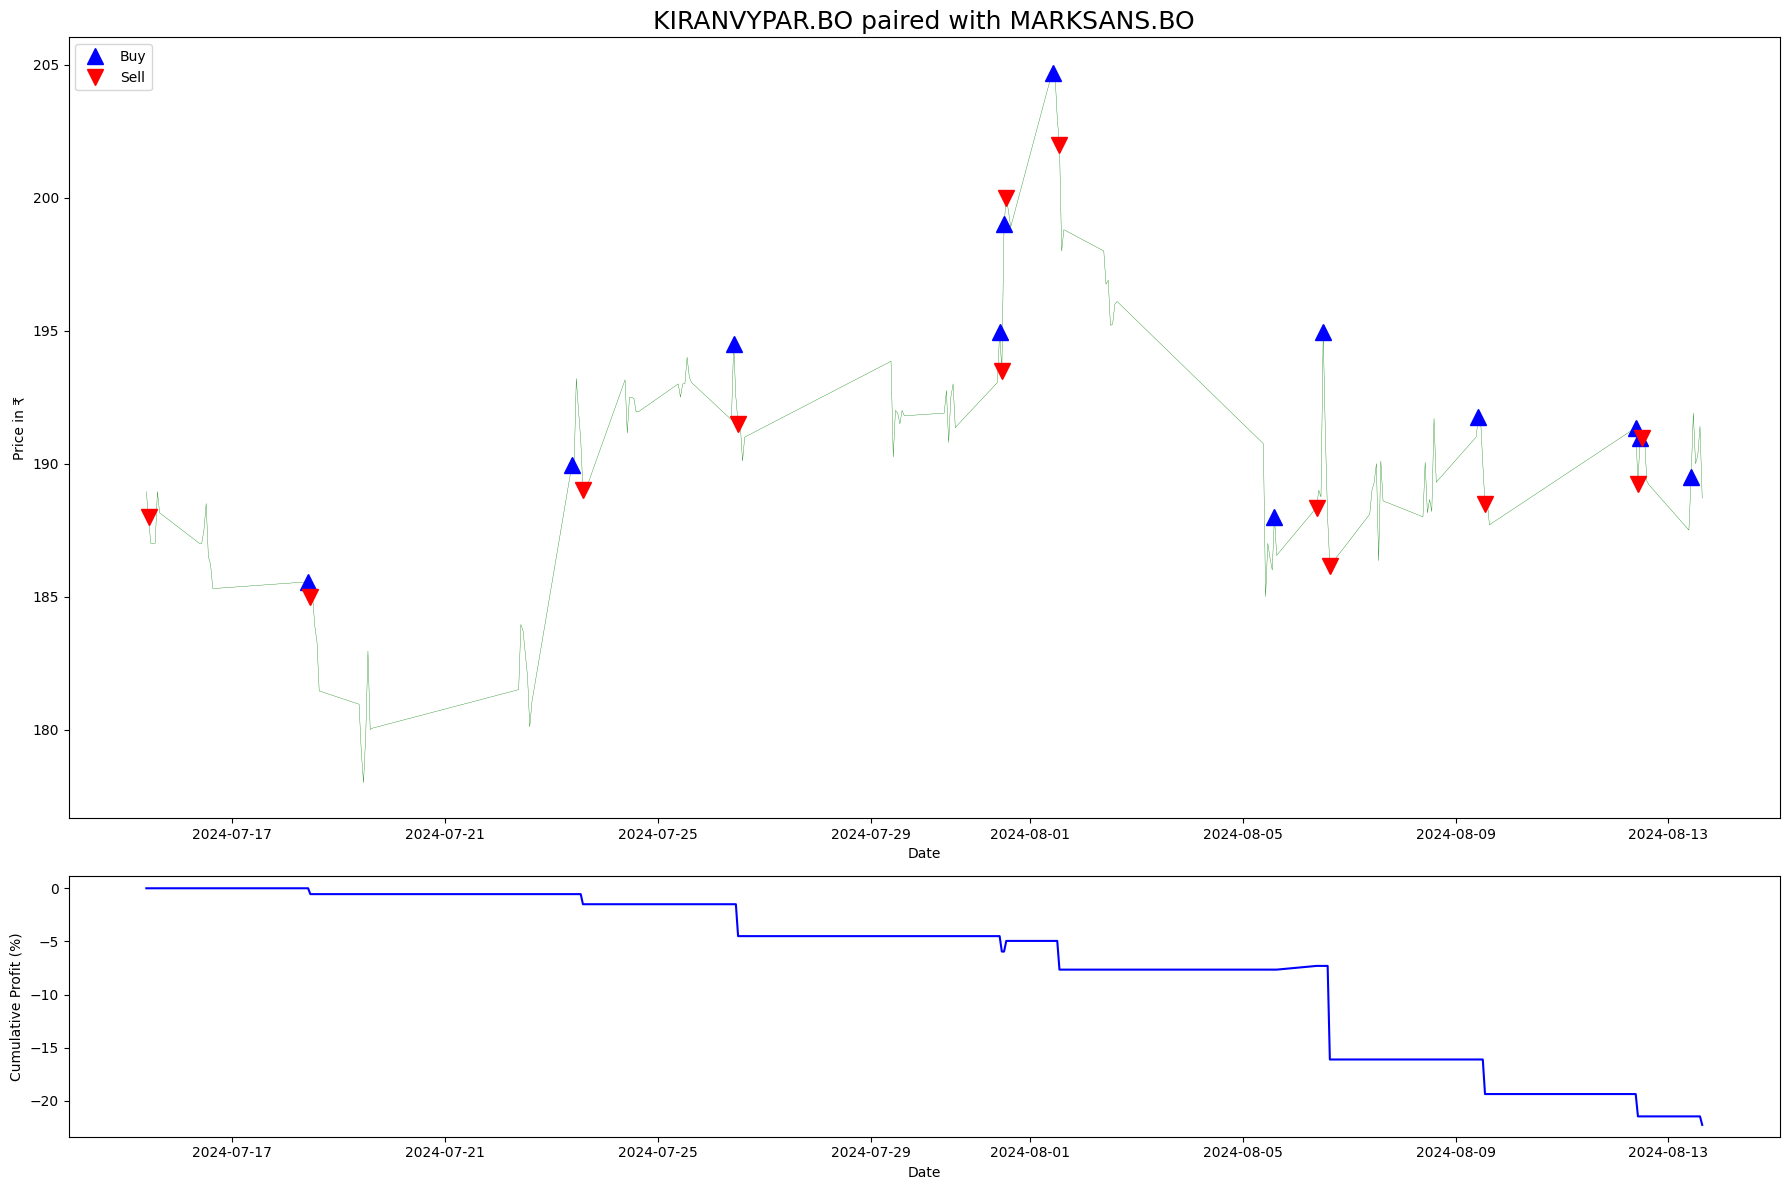

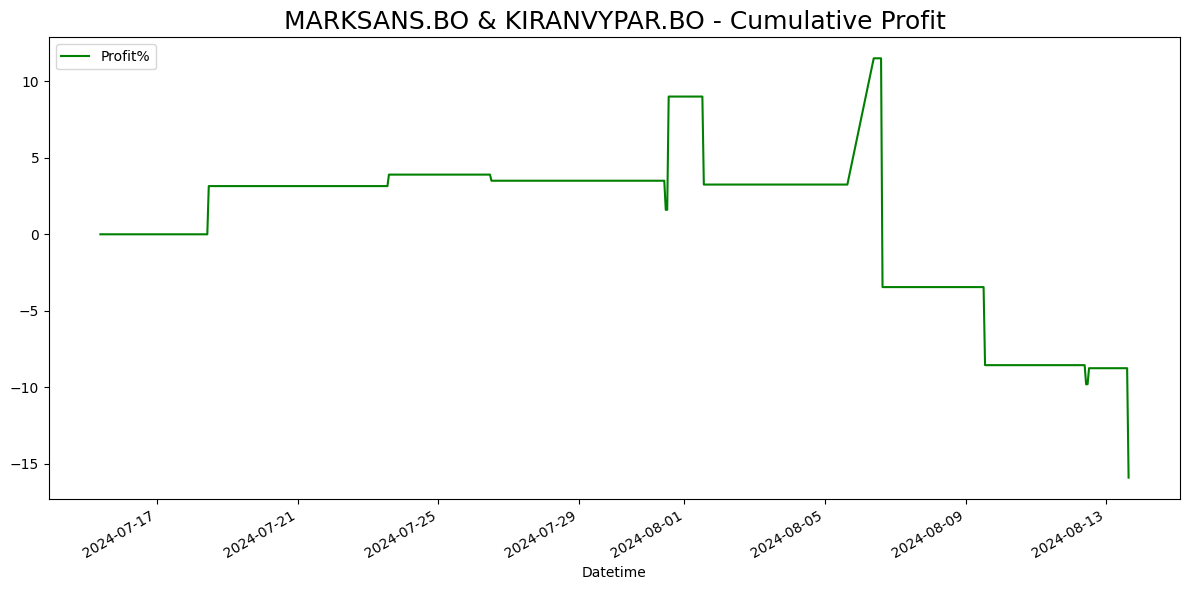

In [56]:
pairwise_analysis('MARKSANS.BO', 'KIRANVYPAR.BO')

In [ ]:
# Assuming 'data' is a pandas Series or DataFrame containing the time series data
data = uts_sanitized['GALAXYSURF.BO']['Adj Close']  # Replace with your actual data

# Splitting the data into training and testing sets (50/50 split)
train_size = int(len(data) * 0.5)
train_data = data[:train_size]
test_data = data[train_size:]

# Preprocessing: Scaling the data
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data.values.reshape(-1, 1))
test_data_scaled = scaler.transform(test_data.values.reshape(-1, 1))

# Reshaping the data for LSTM input (samples, timesteps, features)
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 10  # Adjust as needed
X_train, y_train = create_sequences(train_data_scaled, seq_length)
X_test, y_test = create_sequences(test_data_scaled, seq_length)

# Building the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(units=50))
model.add(Dense(2))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

# Training the model
model.fit(X_train, y_train, epochs=500, batch_size=32)  # Adjust epochs and batch size as needed

# Making predictions
y_pred_scaled = model.predict(X_test)

# Inverting the scaling to get actual predictions
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(test_data.index[seq_length:], y_test_actual, label='Actual')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('LSTM Prediction vs Actual')
plt.legend()
plt.show()


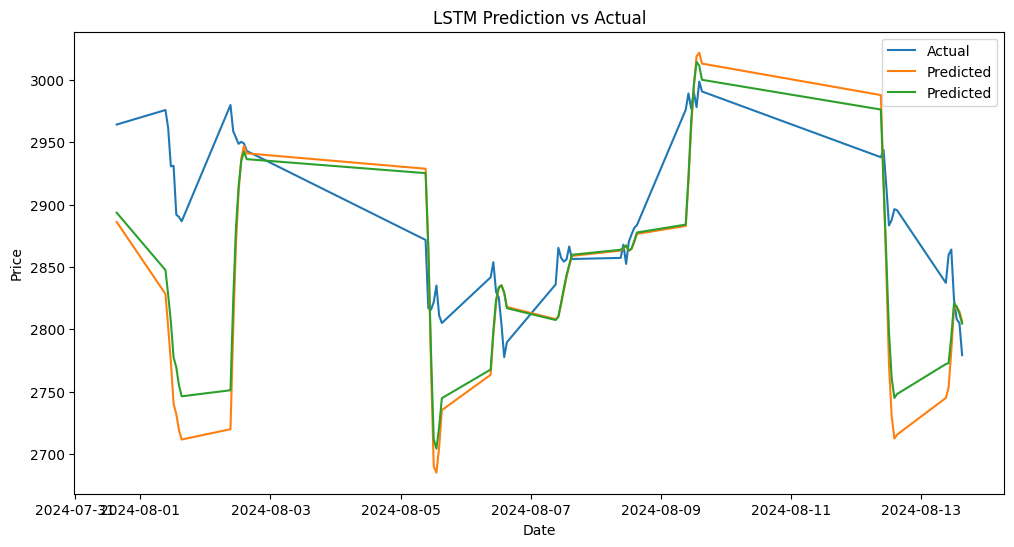

In [67]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(test_data.index[seq_length:], y_test_actual, label='Actual')
plt.plot(test_data.index[seq_length:], y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('LSTM Prediction vs Actual')
plt.legend()
plt.show()